In [44]:
import sys
from pathlib import Path
project_root = Path.cwd().parent.parent
sys.path.append(str(project_root))
project_root = Path.cwd().parent
sys.path.append(str(project_root))
from visualization.utils import defaultColors
from helpers import load_from_path, save_pdf, get_dfs

import pandas as pd
from pathlib import Path
import numpy as np

In [45]:
exp = "GAS-004"
agg_type = "agg"
# agg_type = "raw"

df, df_mean_std = get_dfs(exp)

In [46]:

def is_float_column(column, df):
    return df[column].dtype in [np.float64, np.float32]


def get_color(column, df):
    labels = df[column]
    if is_float_column(column, df):
        # Use a continuous colormap for float-valued columns
        norm = plt.Normalize(labels.min(), labels.max())
        cmap = plt.cm.viridis
        colors = cmap(norm(labels))
    else:
        # Use distinct colors for category or integer-valued columns
        unique_labels = np.unique(labels)
        cmap = plt.cm.tab10
        colors_dict = {label: cmap(i) for i, label in enumerate(unique_labels)}
        colors = np.array([colors_dict[label] for label in labels])

    return colors


def scatter_plot(df, x, y, cc, mc, filter_data=""):

    if filter_data == "filter":
        df = df[df["C_OH_C_Zn"] > 1.6]

    colors = get_color(cc, df)
    colors_dict = {label: colors[i] for i, label in enumerate(df[cc].unique())}

    markers_all = ["o", "d"]
    markers_dict = {
        label: markers_all[idx % len(markers_all)]
        for idx, label in enumerate(df[mc].unique())
    }
    markers = [markers_dict[label] for label in df[mc]]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))

    for i in range(df.shape[0]):
        row = df.iloc[i]
        color = colors[i]
        marker = markers[i]
        sc = ax.plot(
            row[x],
            row[y],
            marker=marker,
            color=color,
            markersize=10,
            markeredgewidth=0.5,
            markeredgecolor="black",
            alpha=1.0,
        )

    for m in df[mc].unique():
        ax.plot([], [], marker=markers_dict[m], color="k", label=m, linestyle="None")

    # for c in df[cc].unique():
    #     ax.plot([], [], marker="o", color=colors_dict[c], label=f"{cc}: {c}", linestyle="None")

    ax.legend(fontsize=12, title_fontsize=12, title="Initial Sampling")

    # custom colorbar
    if is_float_column(cc, df):
        # Add a colorbar if 'cc' is a float column
        sm = plt.cm.ScalarMappable(
            cmap=plt.cm.viridis,
            norm=plt.Normalize(vmin=df[cc].min(), vmax=df[cc].max()),
        )
        sm.set_array([])
        fig.colorbar(sm, ax=ax, label=cc)

    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.grid(True)

    return fig, ax


[['id_idx', 'repeat_mean', 'initial_sampling', 'initial_sampling', ''], ['id_idx', 'pH_mean', 'initial_sampling', 'initial_sampling', ''], ['id_idx', 'Cond_mean', 'initial_sampling', 'initial_sampling', ''], ['id_idx', 'C_Zn', 'initial_sampling', 'initial_sampling', ''], ['id_idx', 'C_OH_C_Zn', 'initial_sampling', 'initial_sampling', ''], ['id_idx', 'C_OH', 'initial_sampling', 'initial_sampling', ''], ['id_idx', 'Q_AC', 'initial_sampling', 'initial_sampling', ''], ['id_idx', 'Q_AIR', 'initial_sampling', 'initial_sampling', ''], ['id_idx', 'N_ZnO', 'initial_sampling', 'initial_sampling', ''], ['id_idx', 'End', 'initial_sampling', 'initial_sampling', ''], ['id_idx', 'Peak Ratio_mean', 'initial_sampling', 'initial_sampling', ''], ['id_idx', '00n Size_mean', 'initial_sampling', 'initial_sampling', ''], ['id_idx', 'Isotropic Size_mean', 'initial_sampling', 'initial_sampling', ''], ['id_idx', 'Aspect Ratio_mean', 'initial_sampling', 'initial_sampling', ''], ['id_idx', 'experiment_number_mean

C:\Users\queim\AppData\Local\Temp\ipykernel_9136\1499605259.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(10, 7))


Plotting ['id_idx', 'iterID', 'initial_sampling', 'initial_sampling', '']
Plotting ['id_idx', 'x1', 'initial_sampling', 'initial_sampling', '']
Plotting ['id_idx', 'x2', 'initial_sampling', 'initial_sampling', '']
Plotting ['id_idx', 'x3', 'initial_sampling', 'initial_sampling', '']
Plotting ['id_idx', 'x4', 'initial_sampling', 'initial_sampling', '']
Plotting ['id_idx', 'f1', 'initial_sampling', 'initial_sampling', '']
Plotting ['id_idx', 'rho_f1', 'initial_sampling', 'initial_sampling', '']
Plotting ['id_idx', 'mvar_f1', 'initial_sampling', 'initial_sampling', '']
Plotting ['id_idx', 'f2', 'initial_sampling', 'initial_sampling', '']
Plotting ['id_idx', 'rho_f2', 'initial_sampling', 'initial_sampling', '']
Plotting ['id_idx', 'mvar_f2', 'initial_sampling', 'initial_sampling', '']
Plotting ['id_idx', 'f3', 'initial_sampling', 'initial_sampling', '']
Plotting ['id_idx', 'rho_f3', 'initial_sampling', 'initial_sampling', '']
Plotting ['id_idx', 'mvar_f3', 'initial_sampling', 'initial_samp

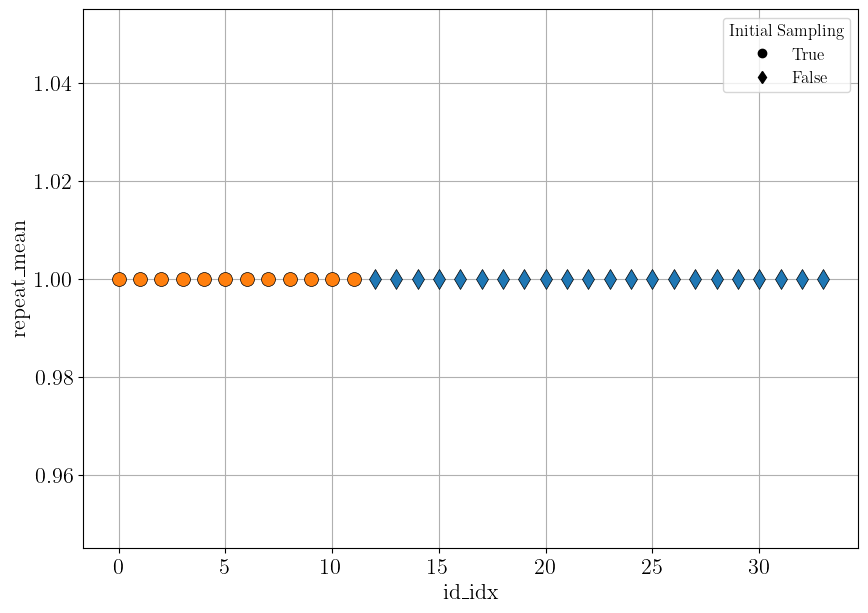

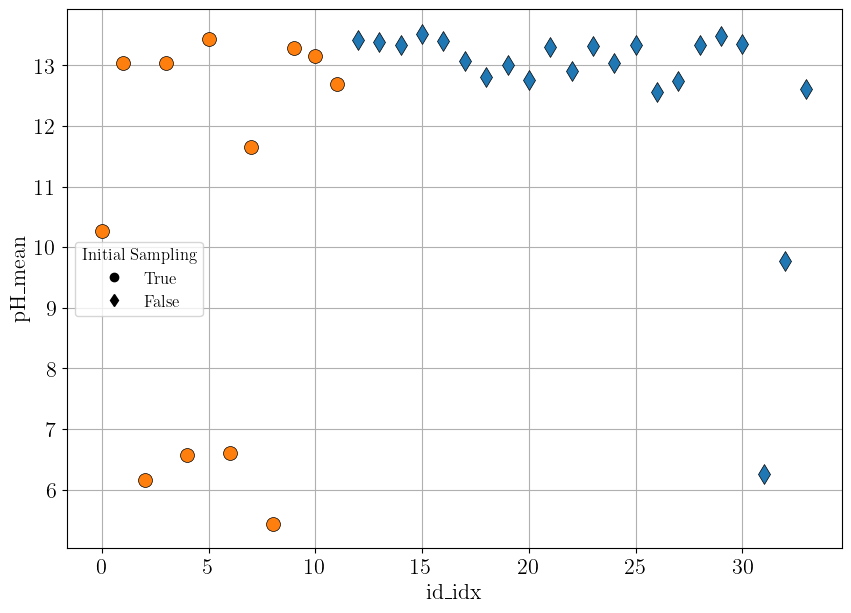

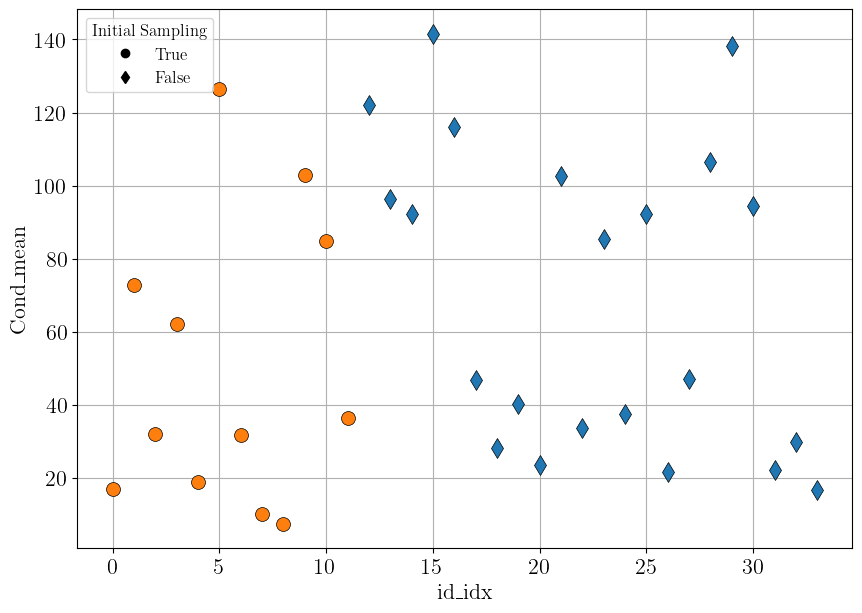

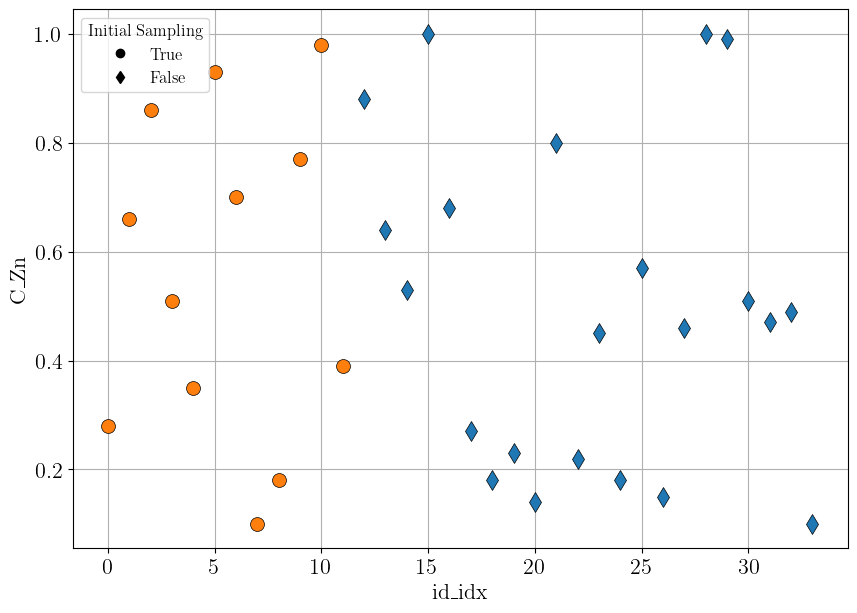

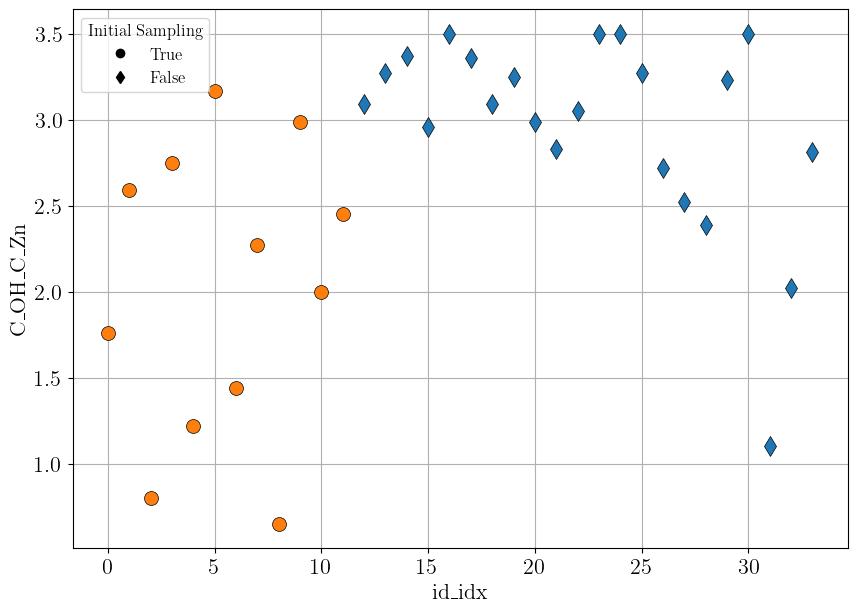

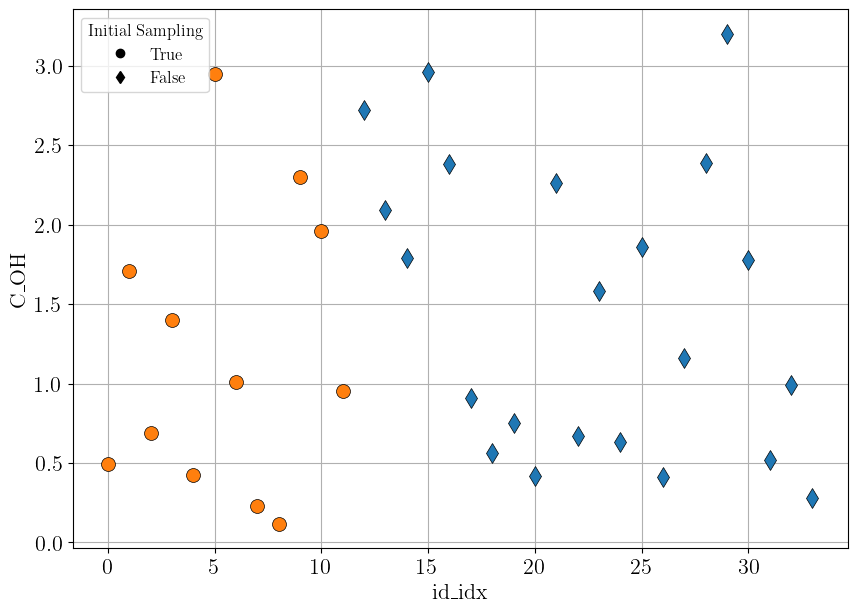

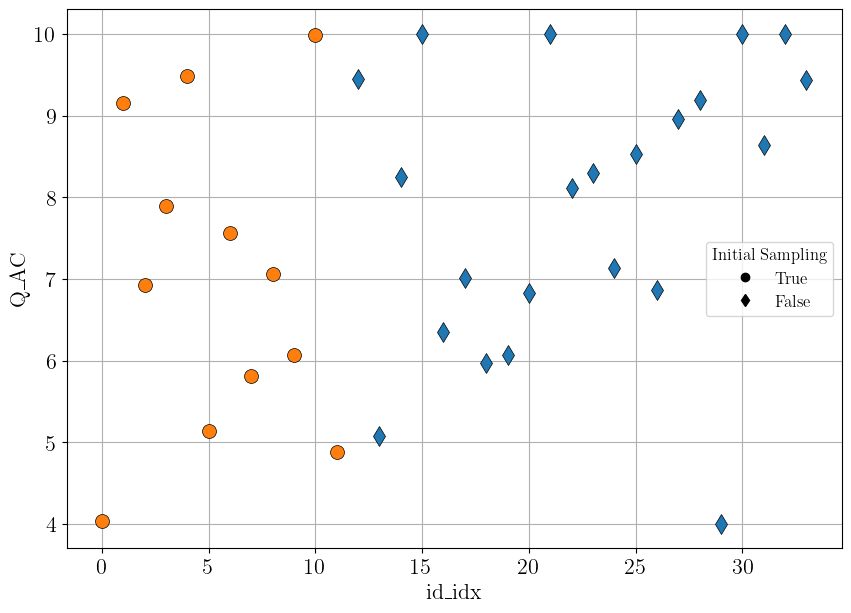

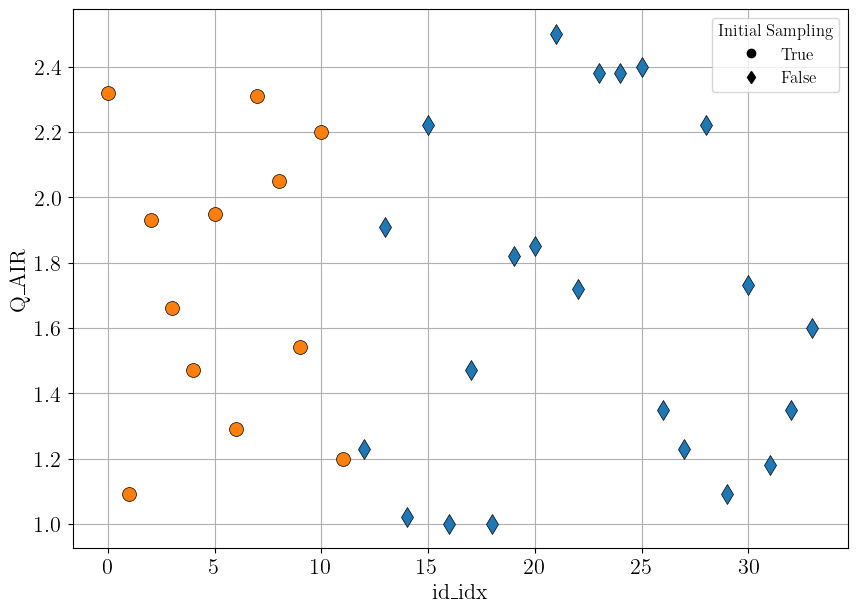

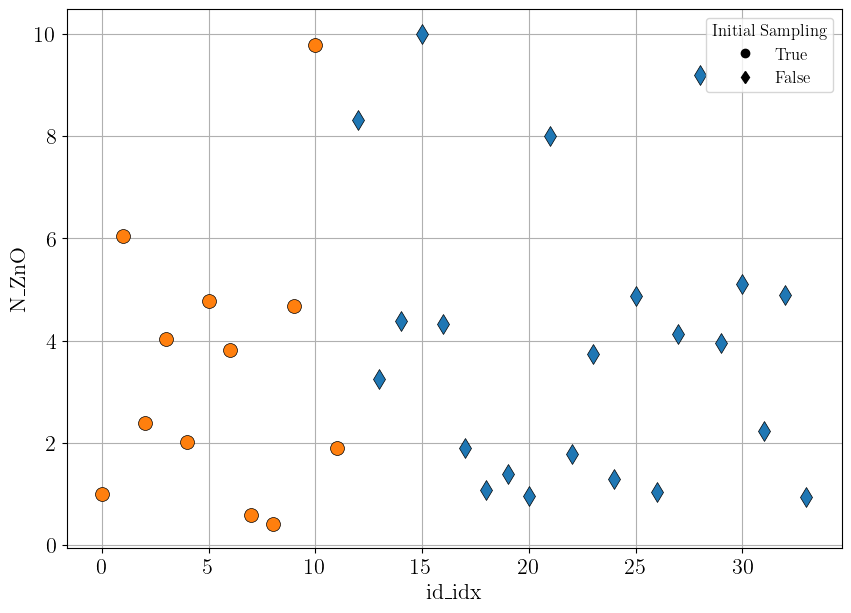

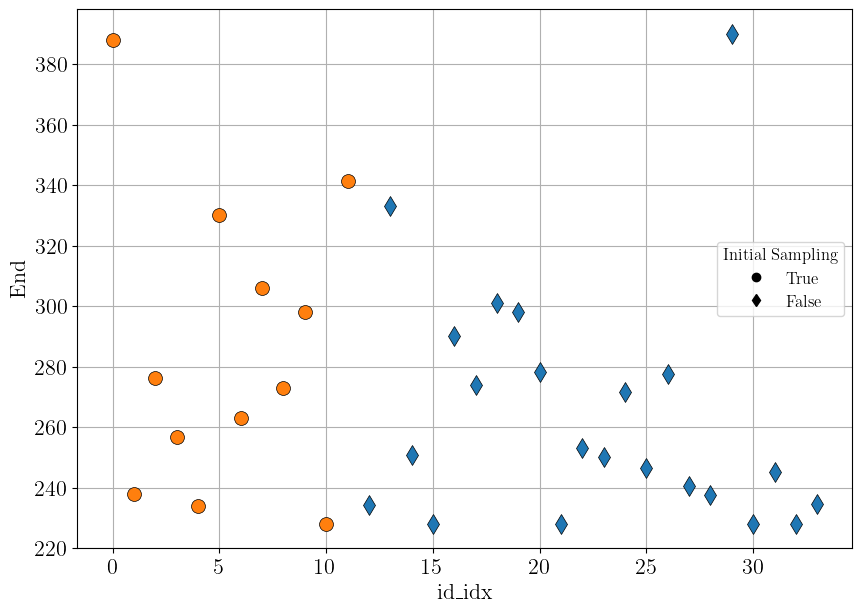

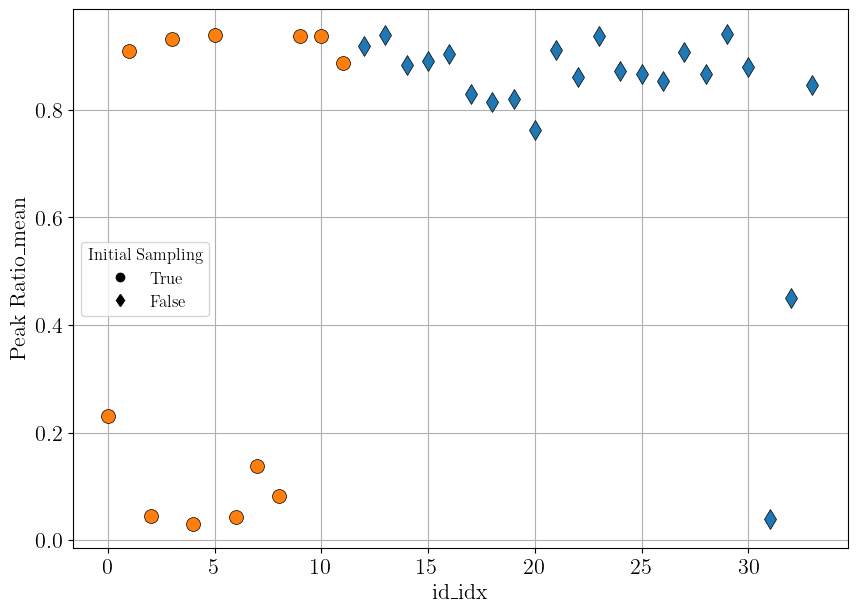

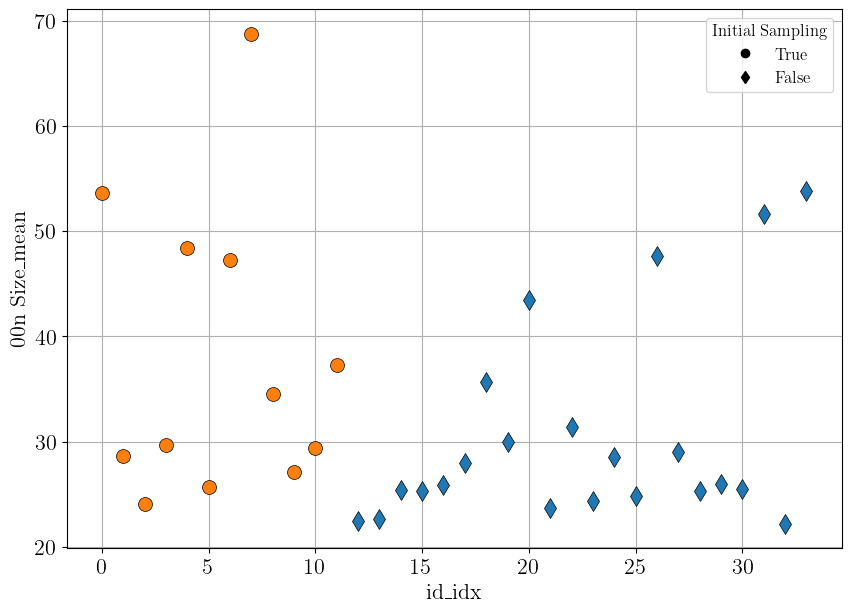

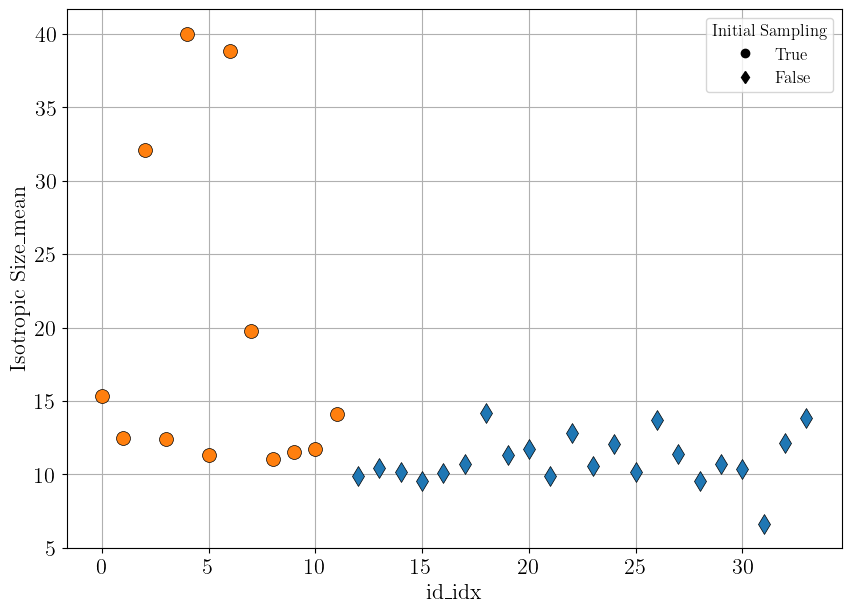

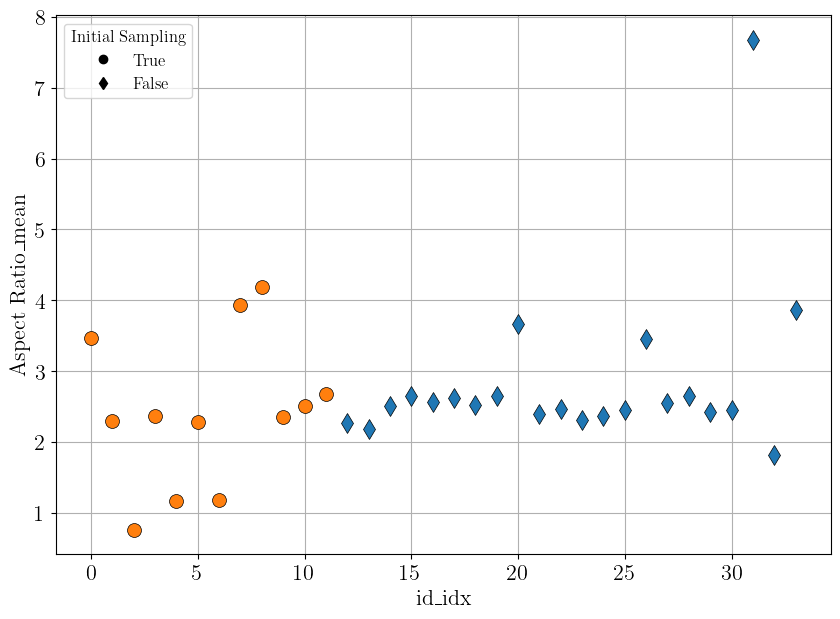

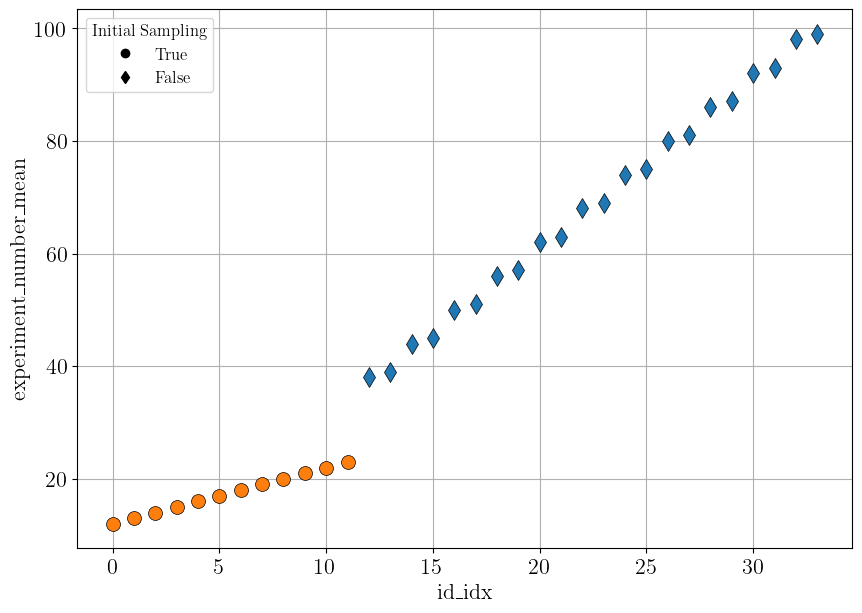

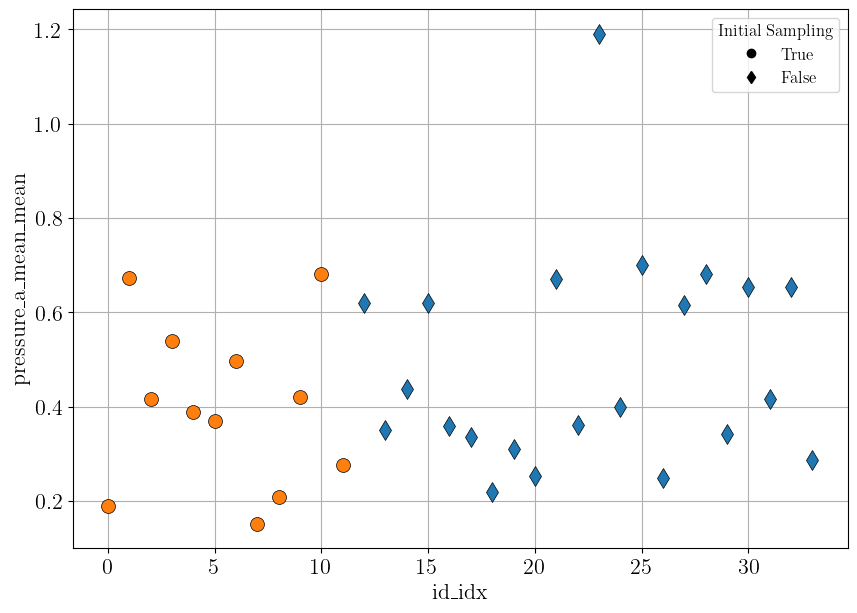

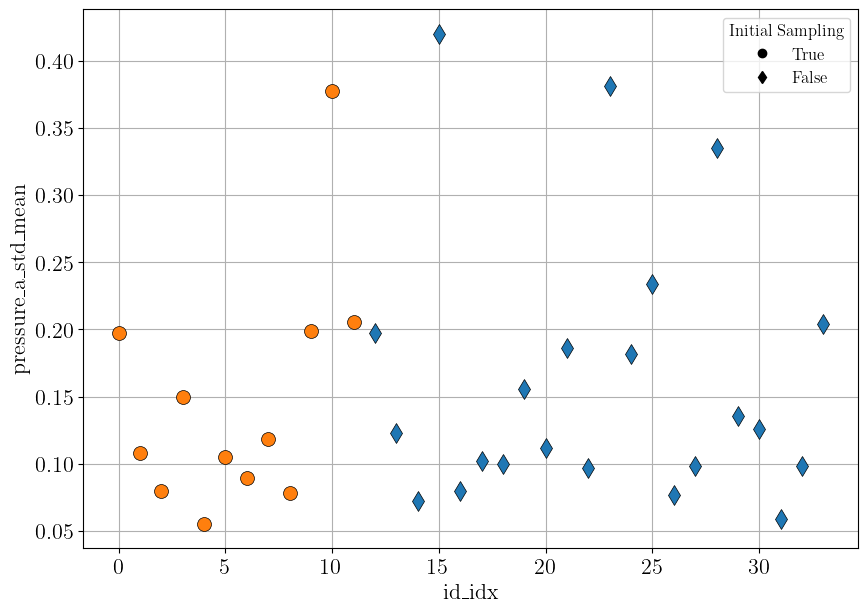

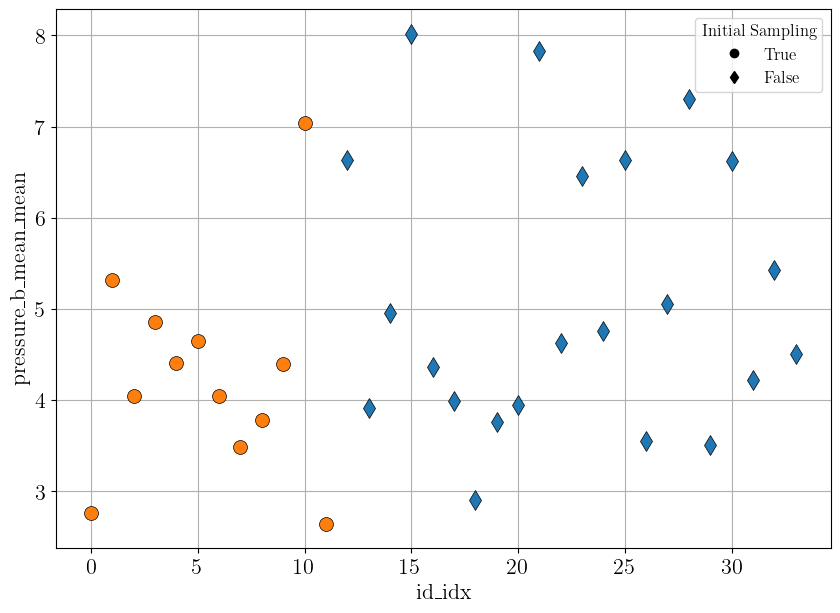

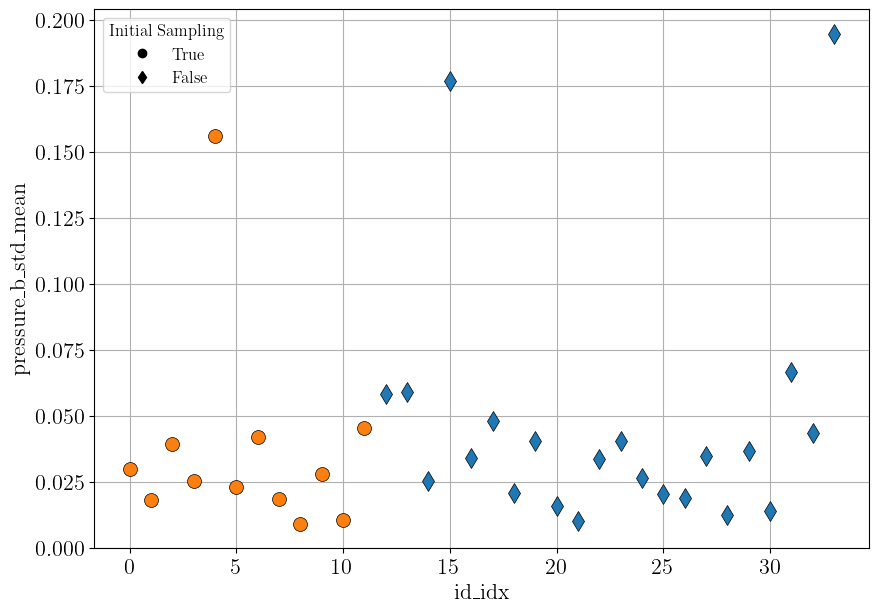

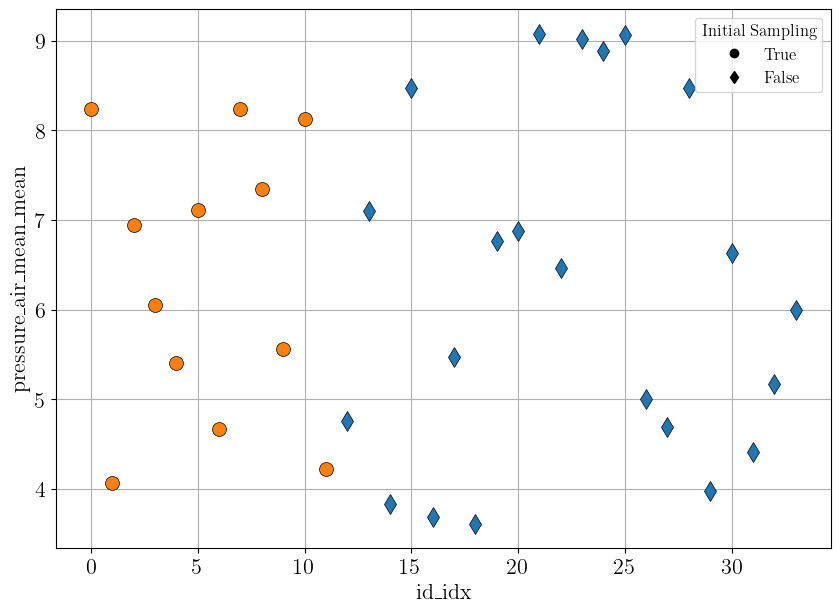

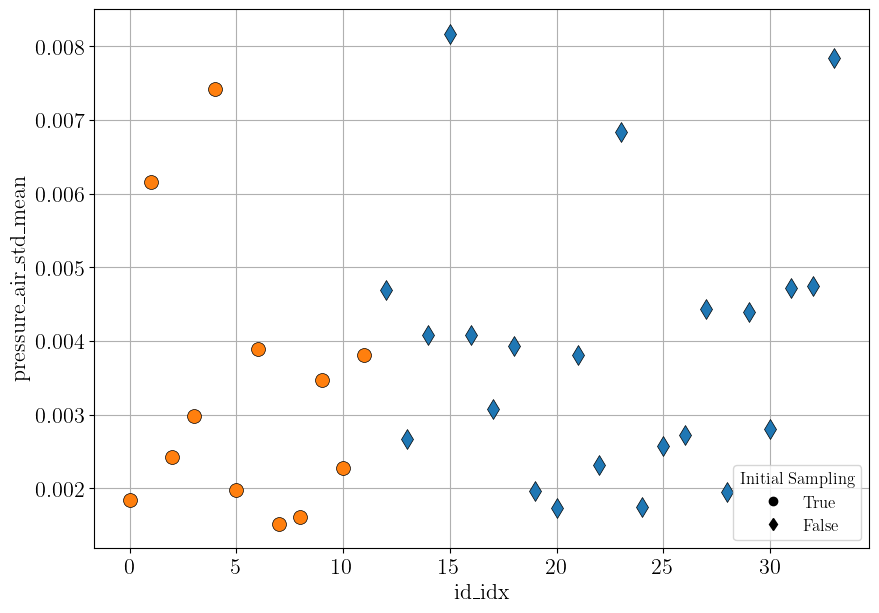

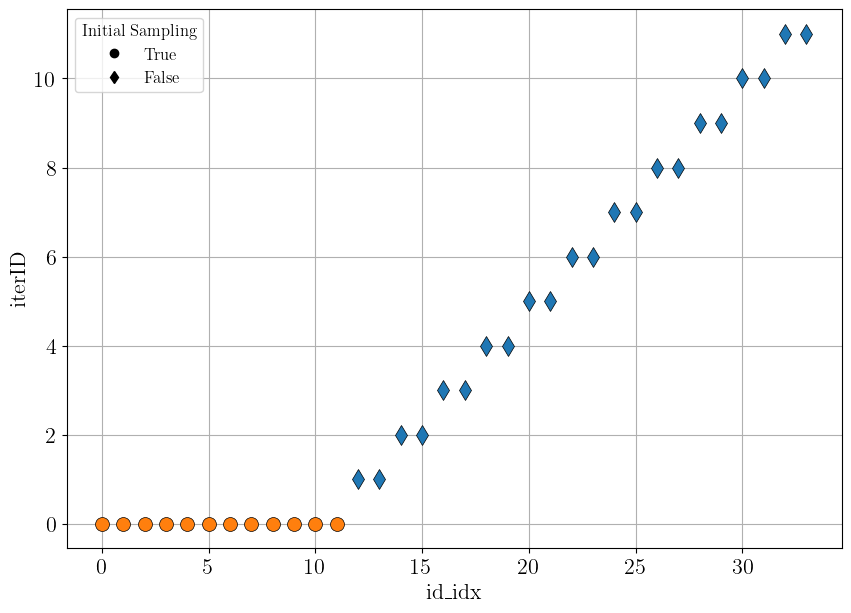

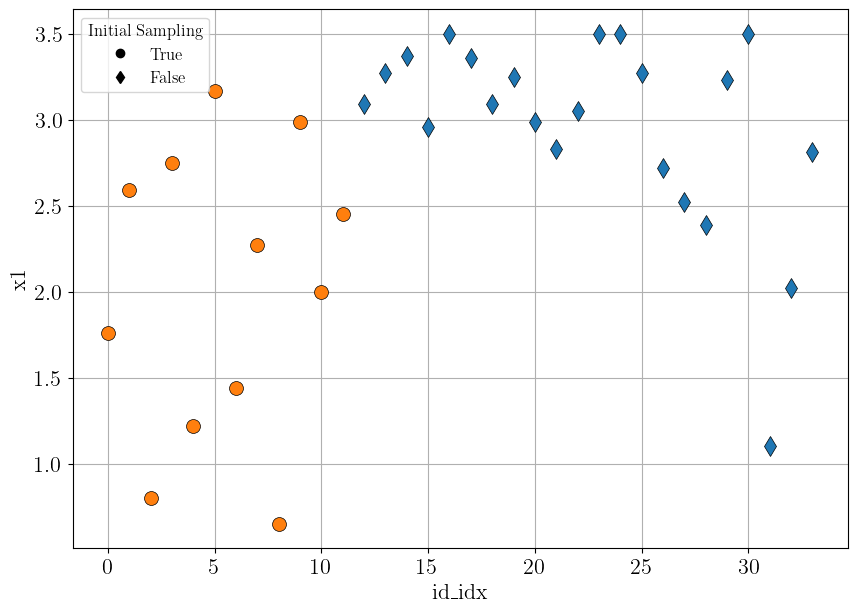

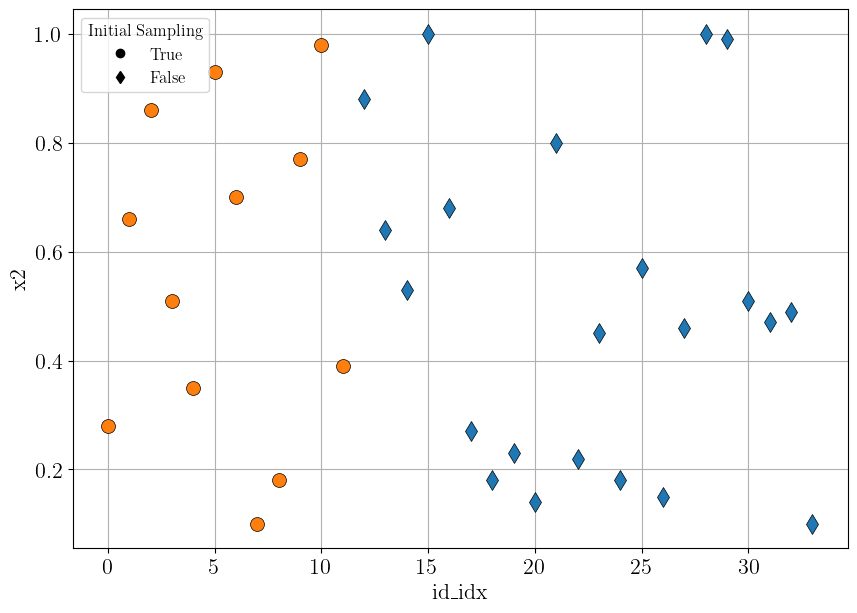

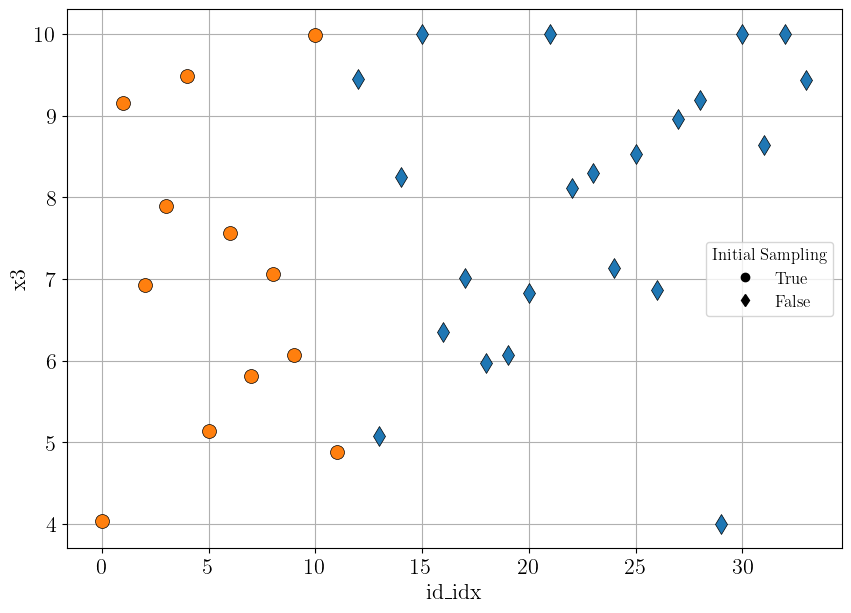

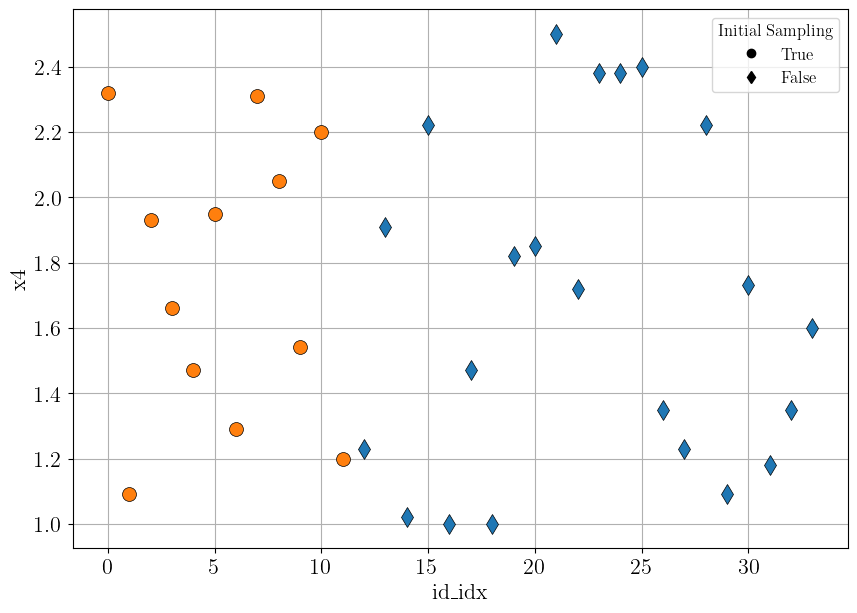

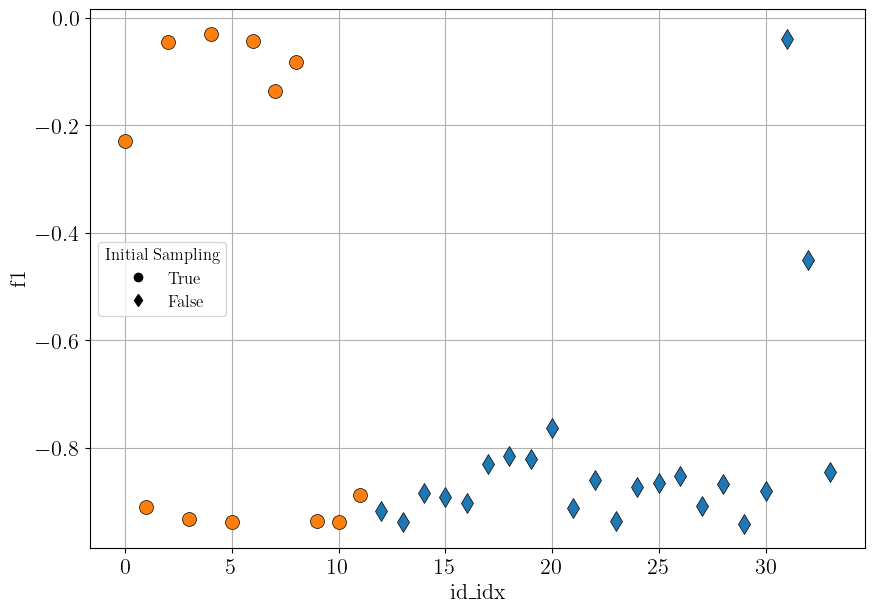

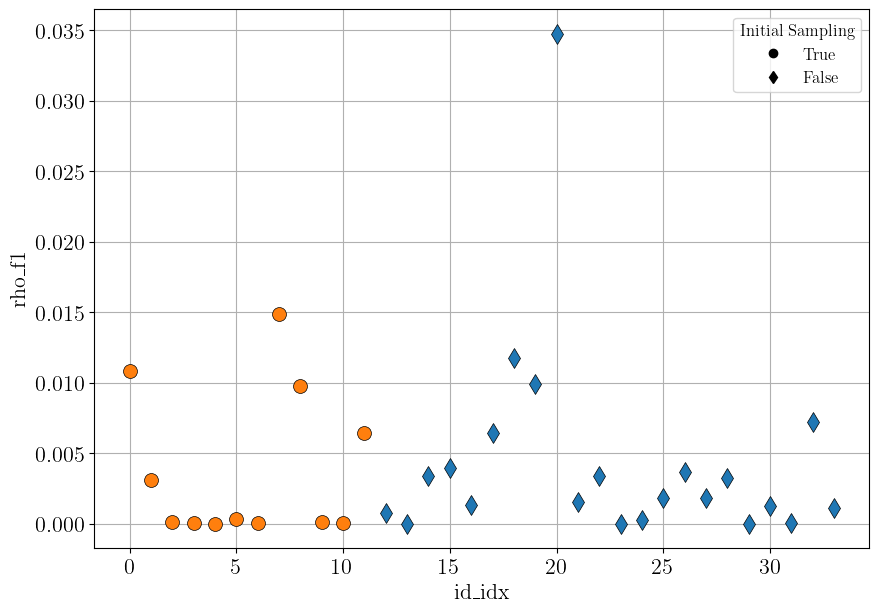

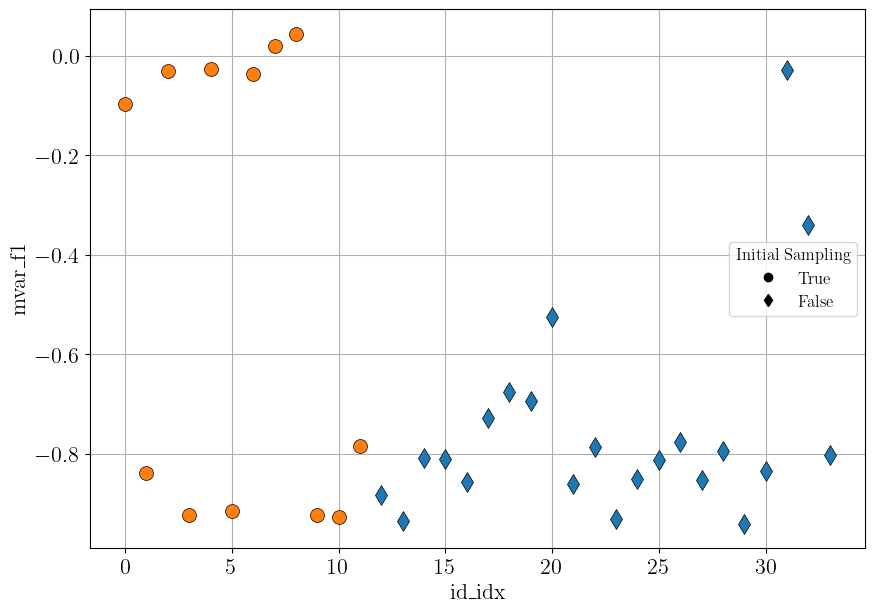

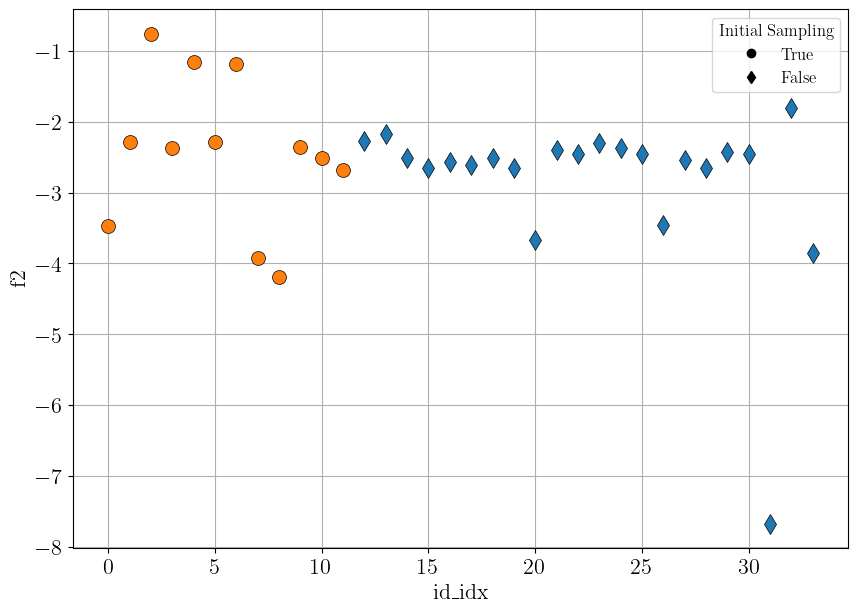

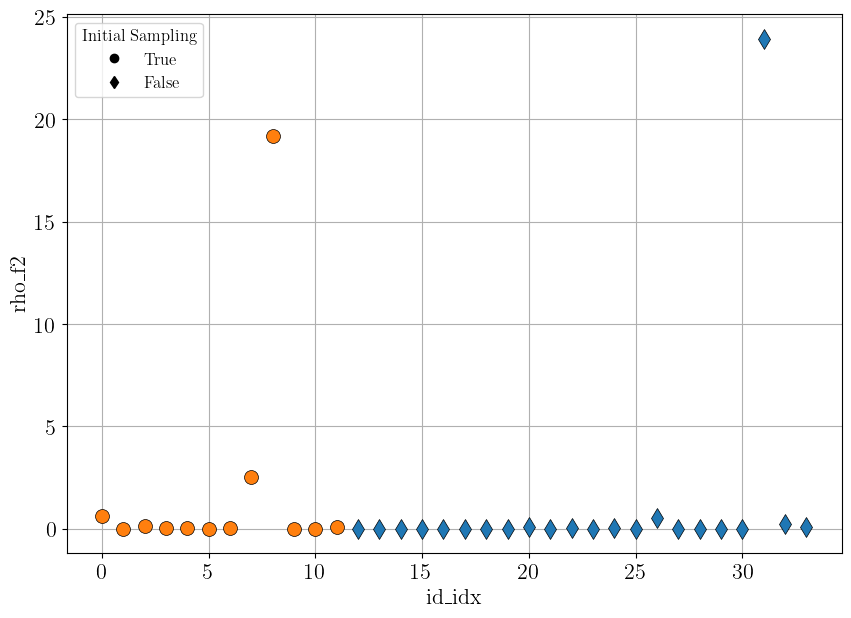

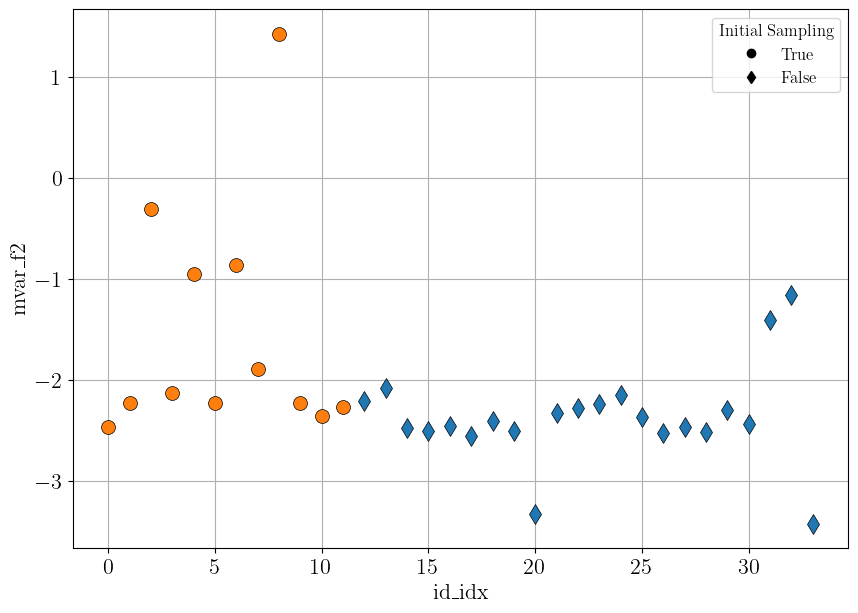

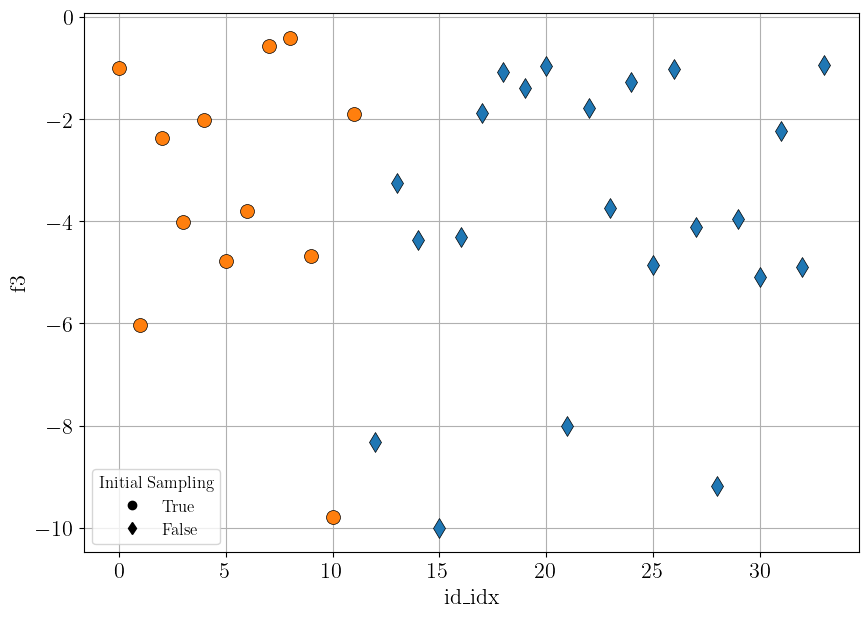

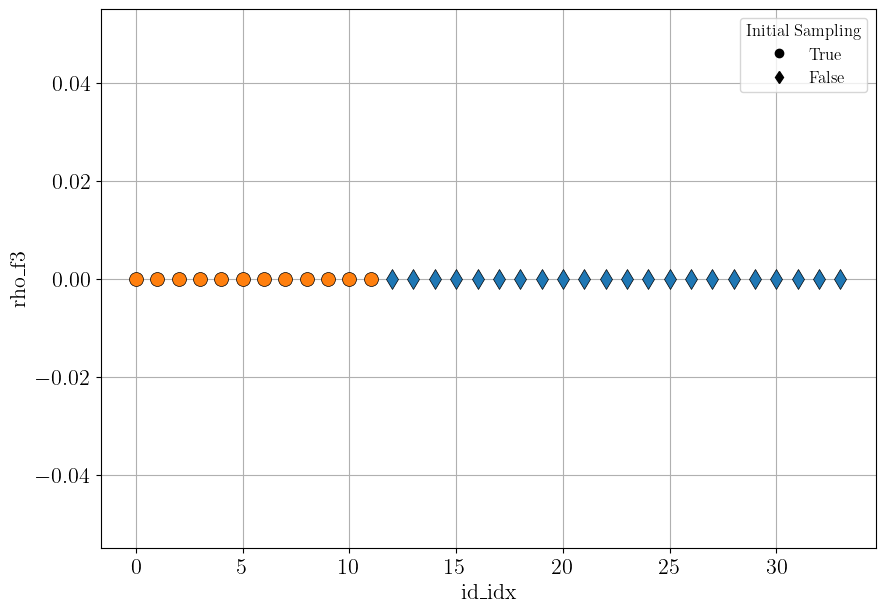

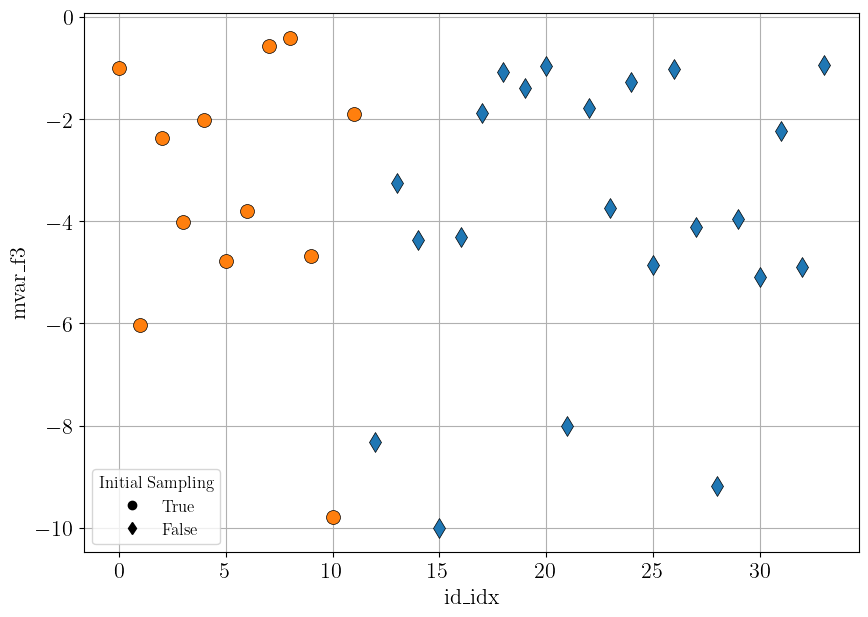

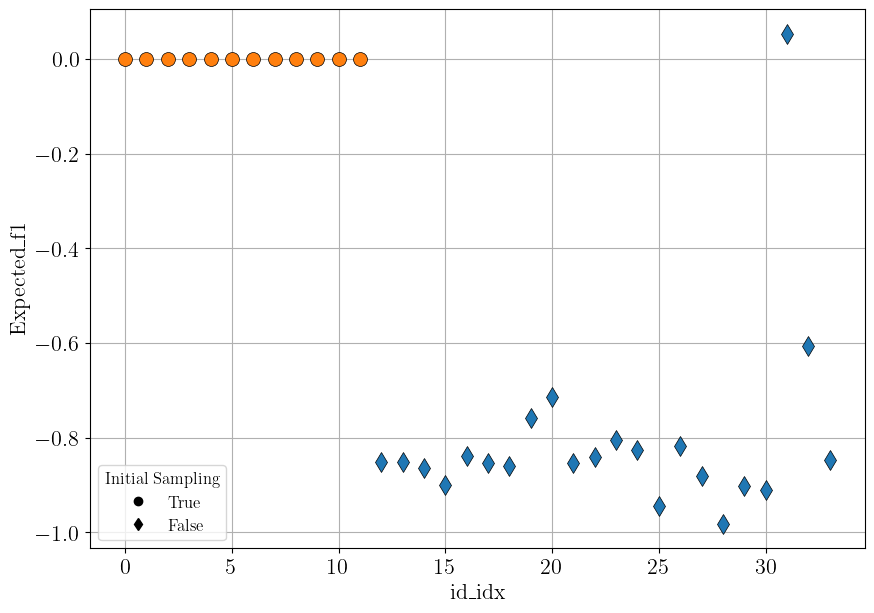

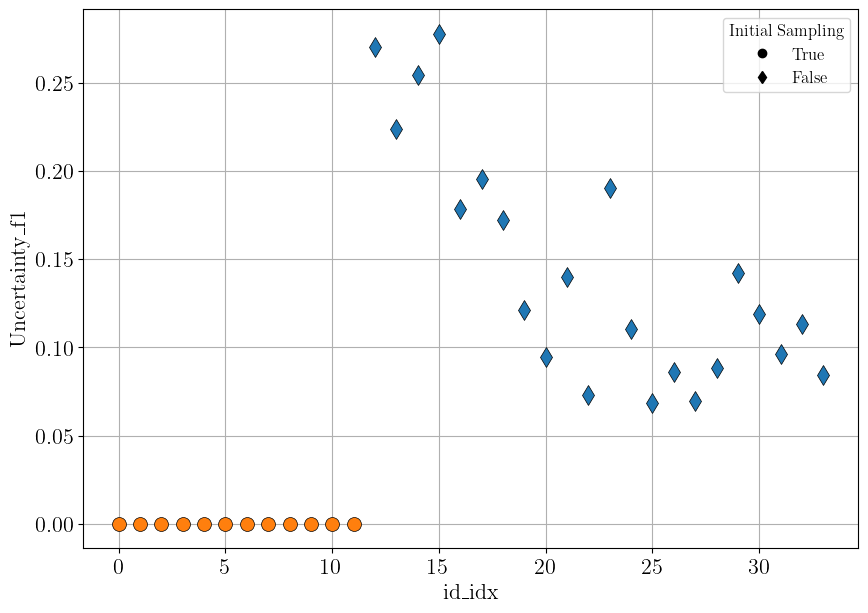

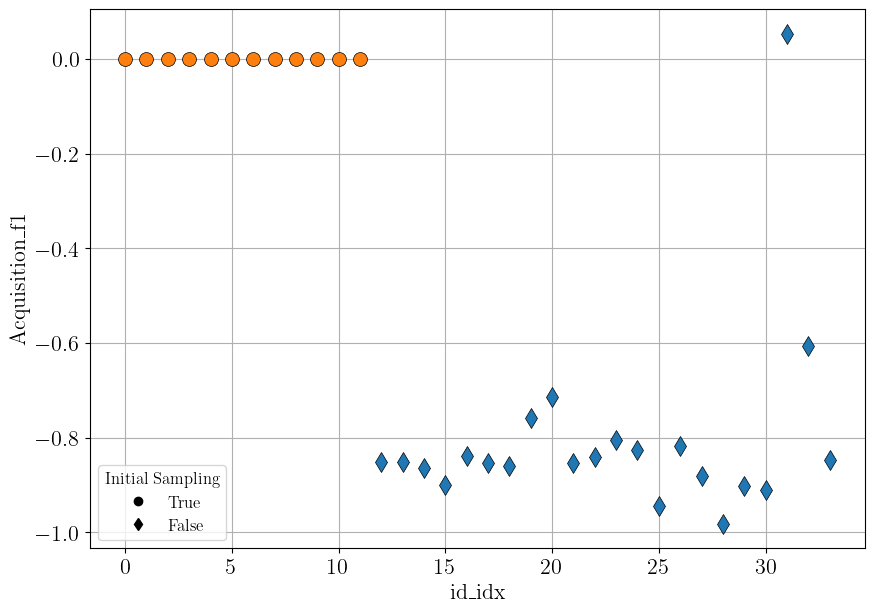

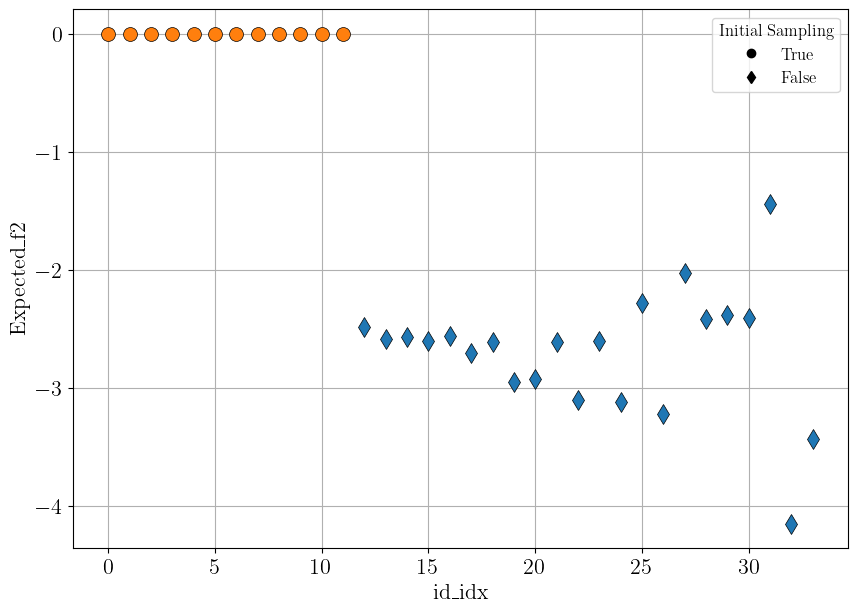

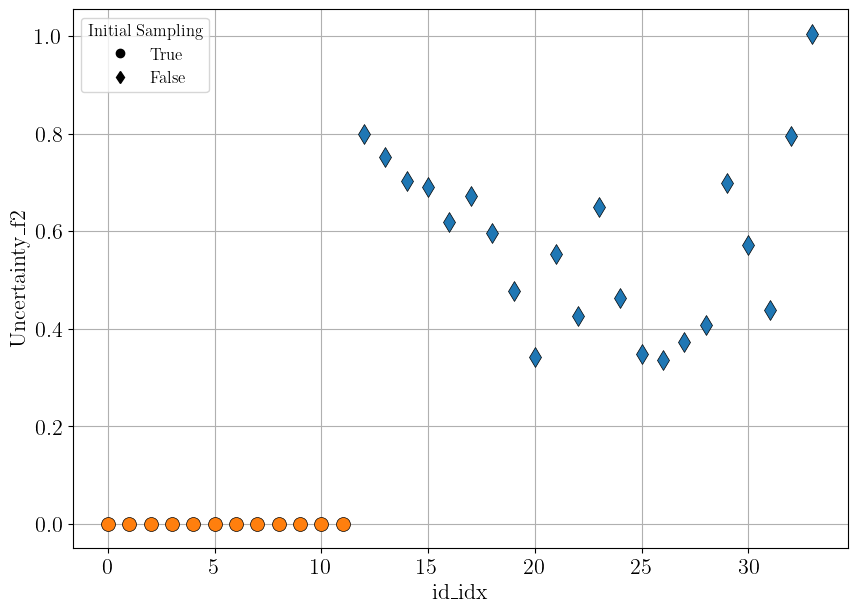

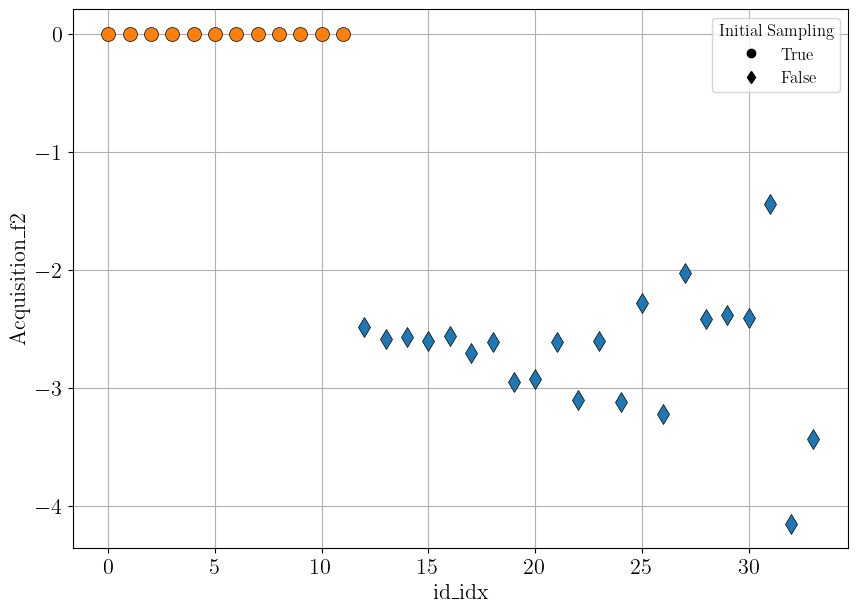

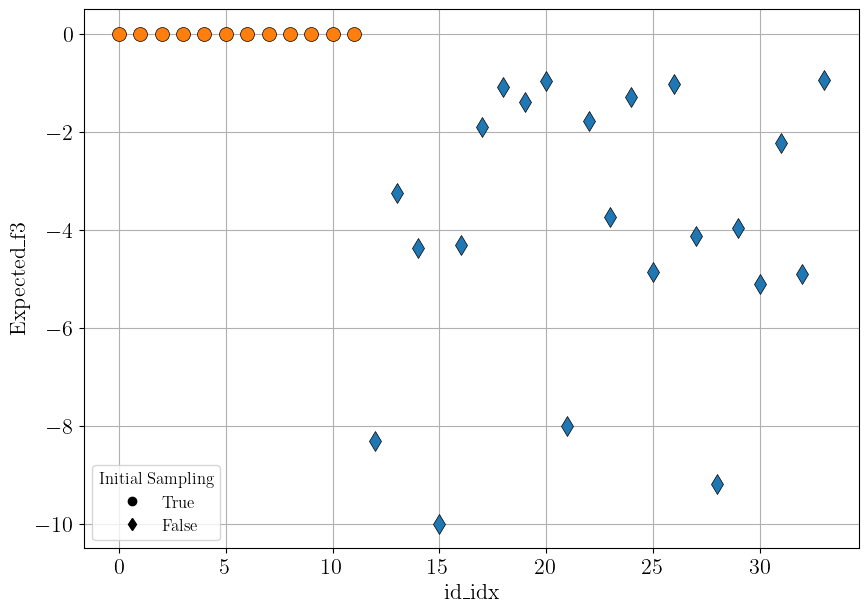

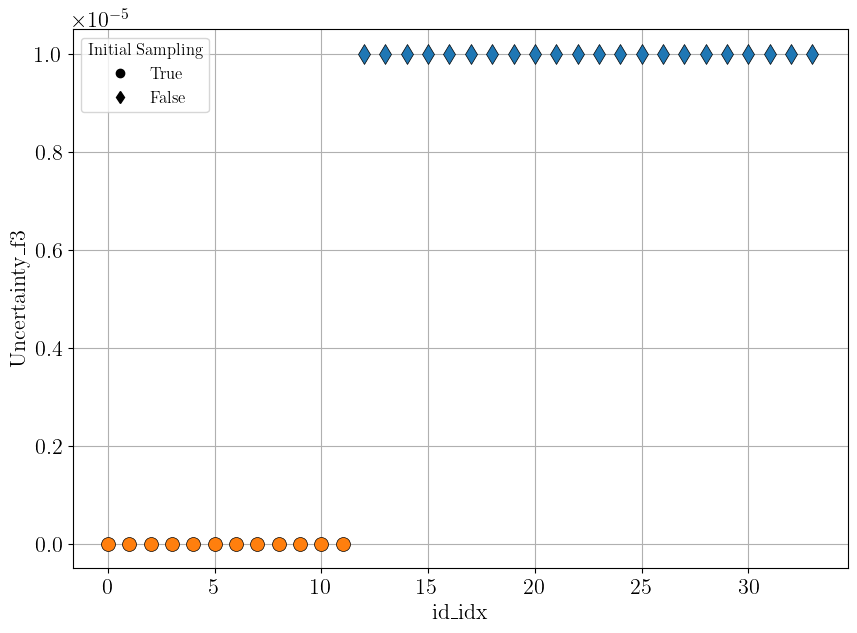

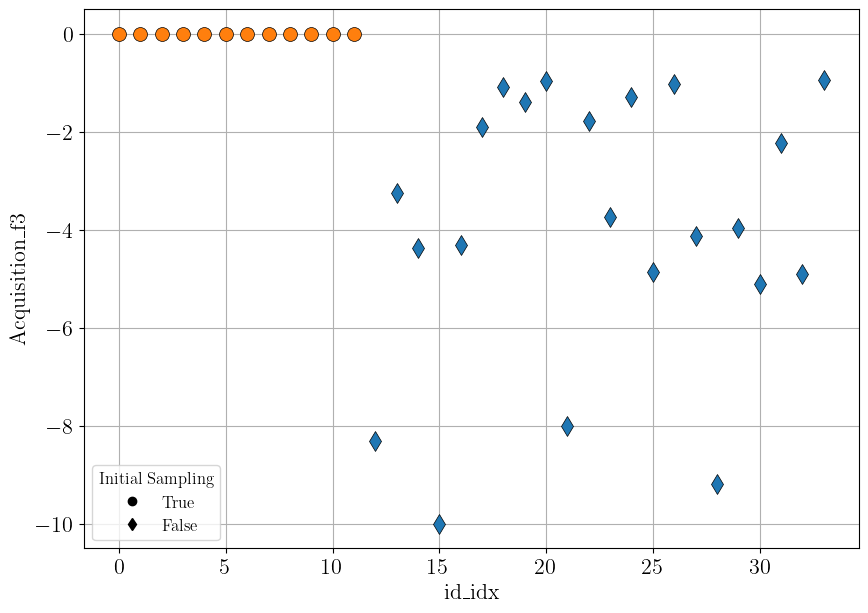

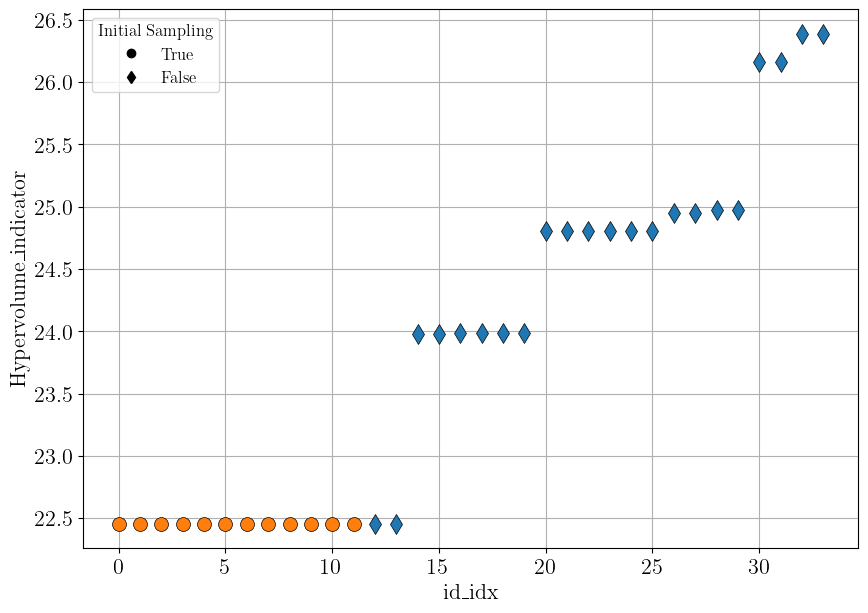

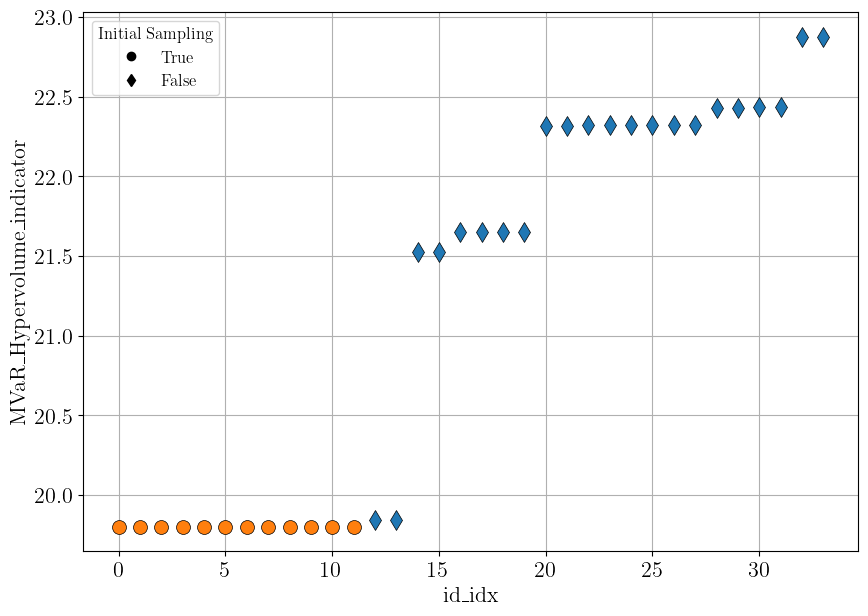

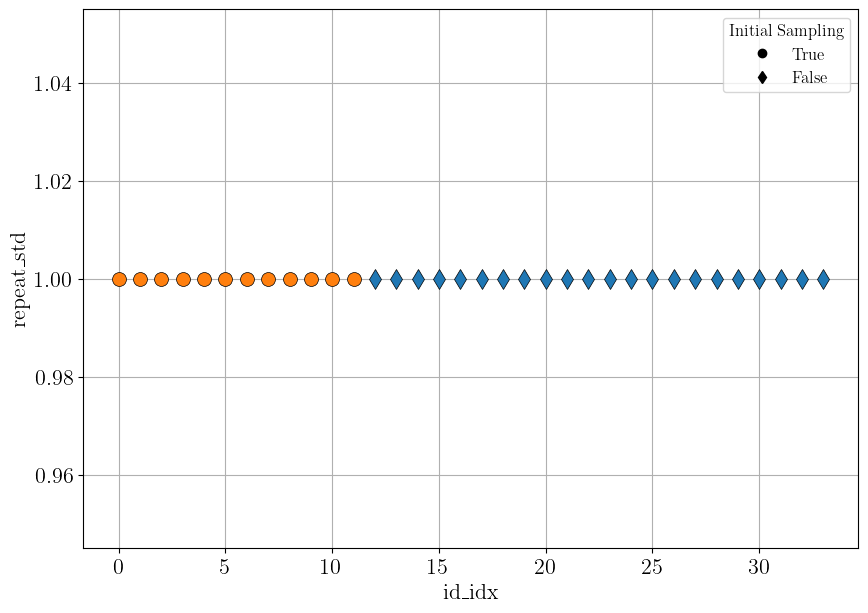

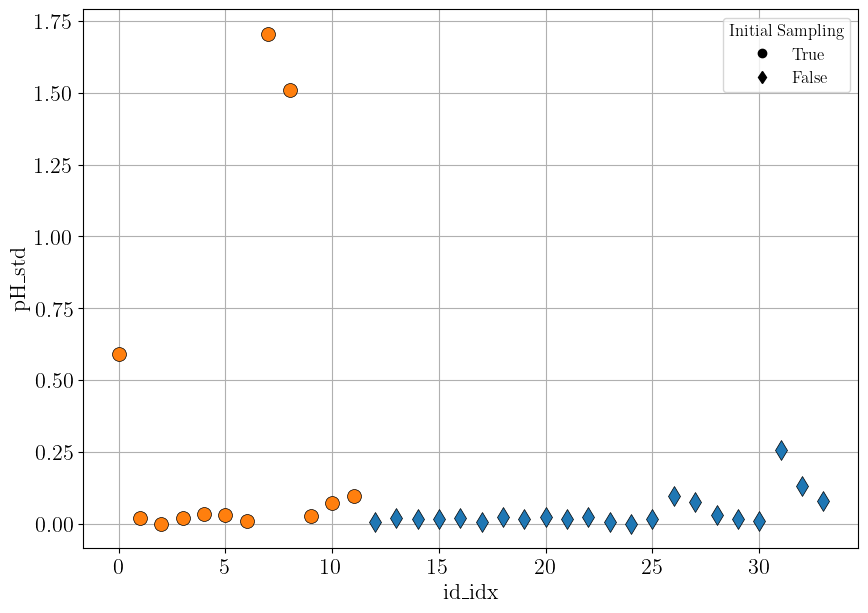

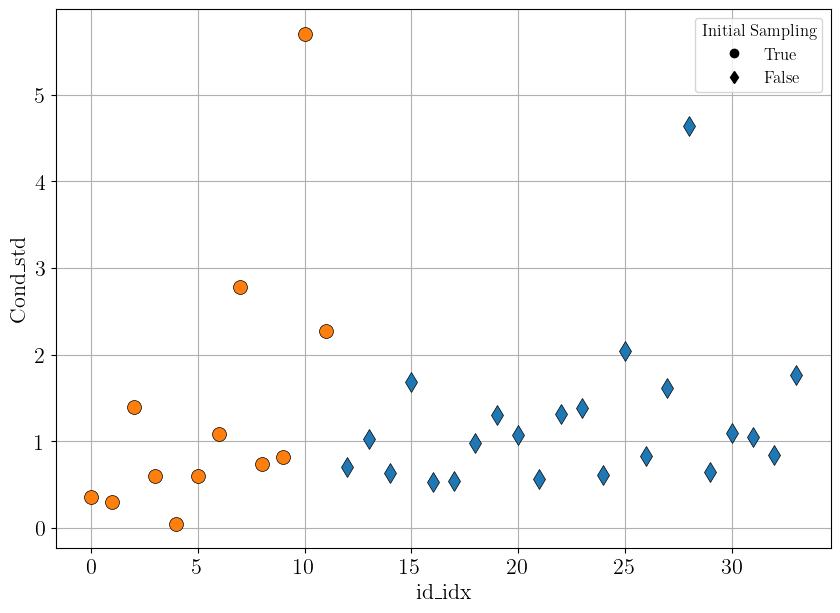

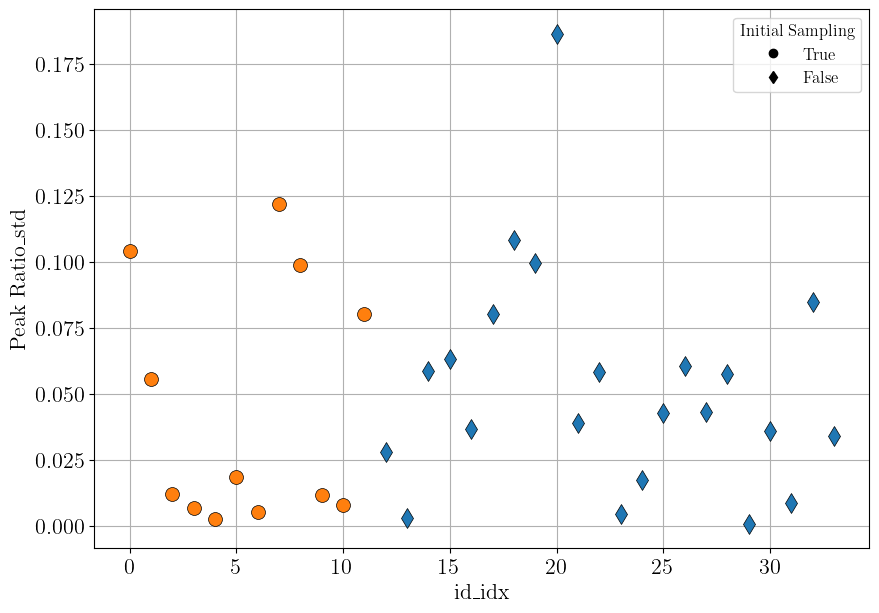

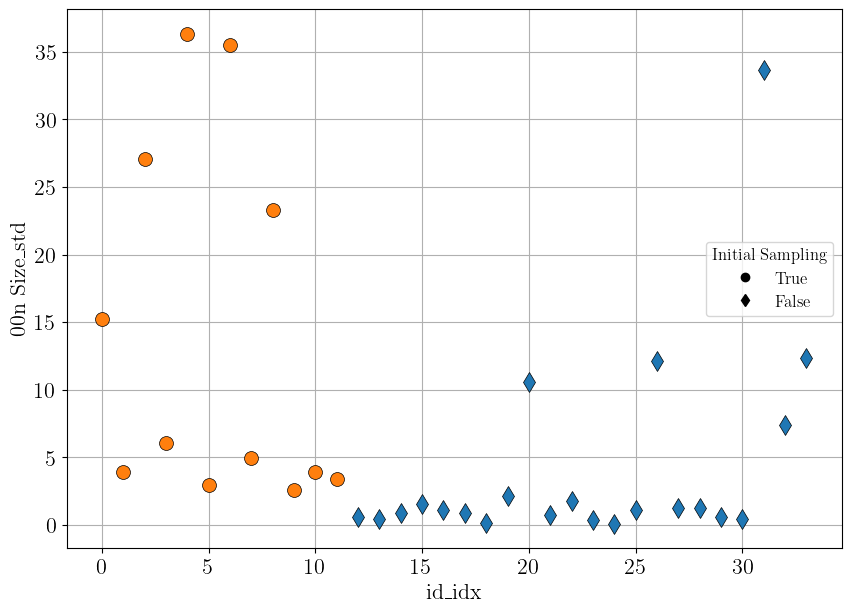

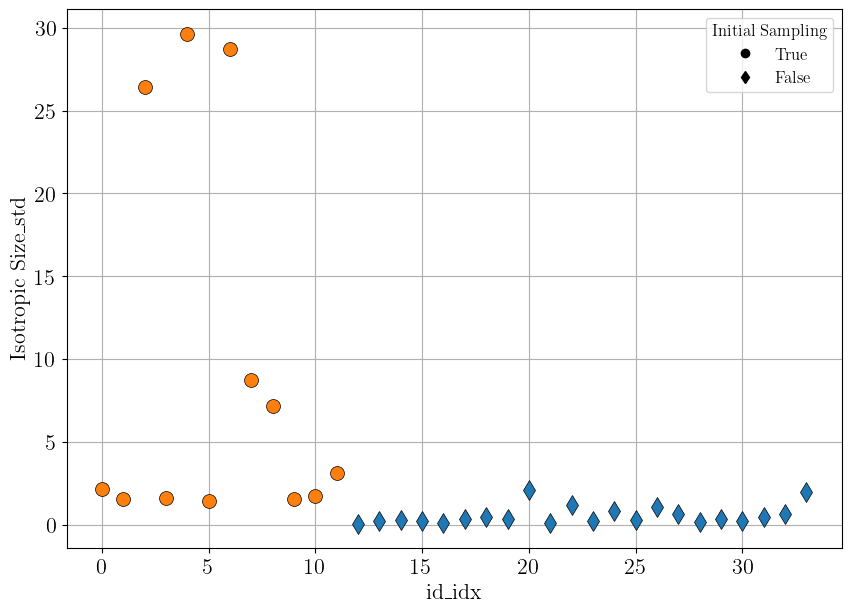

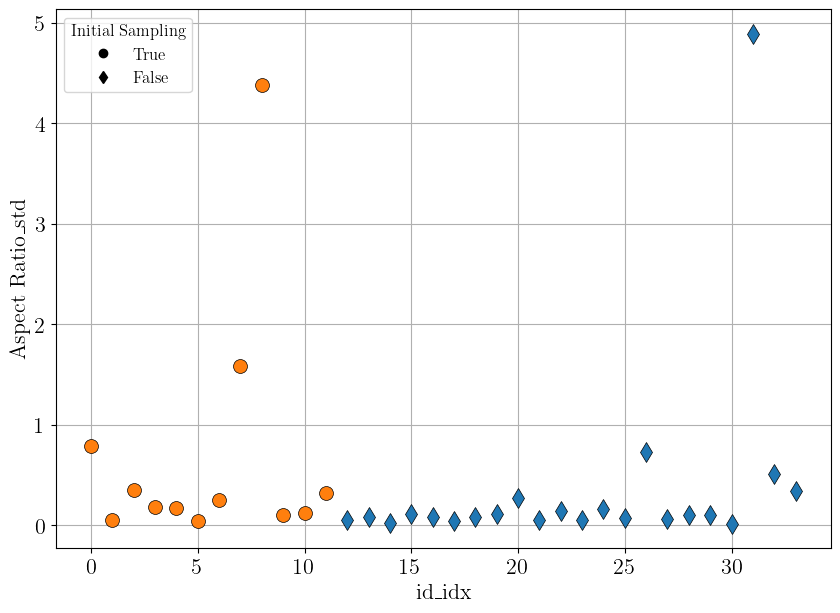

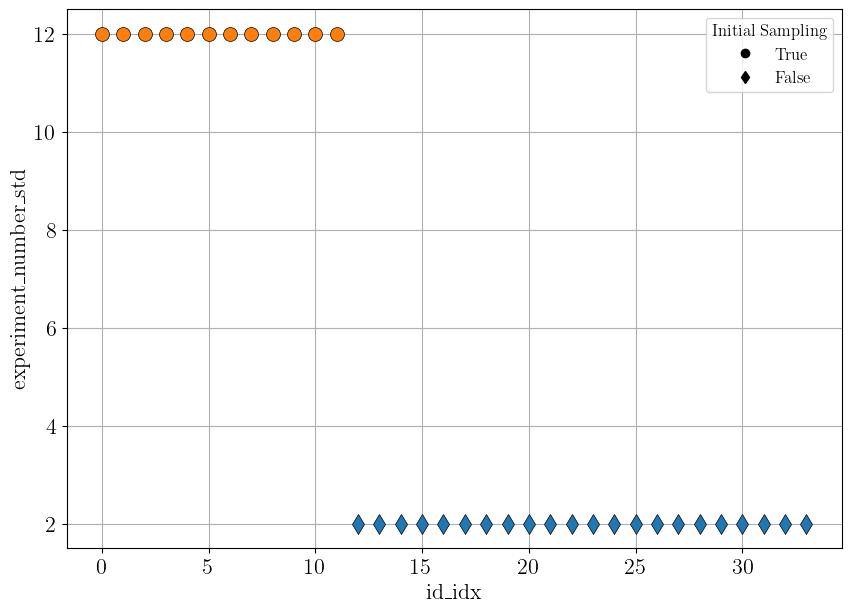

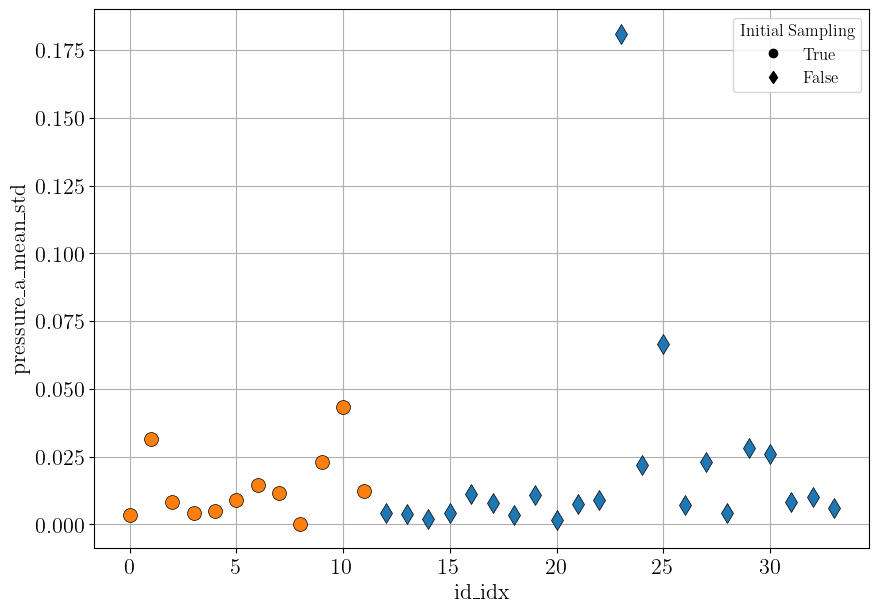

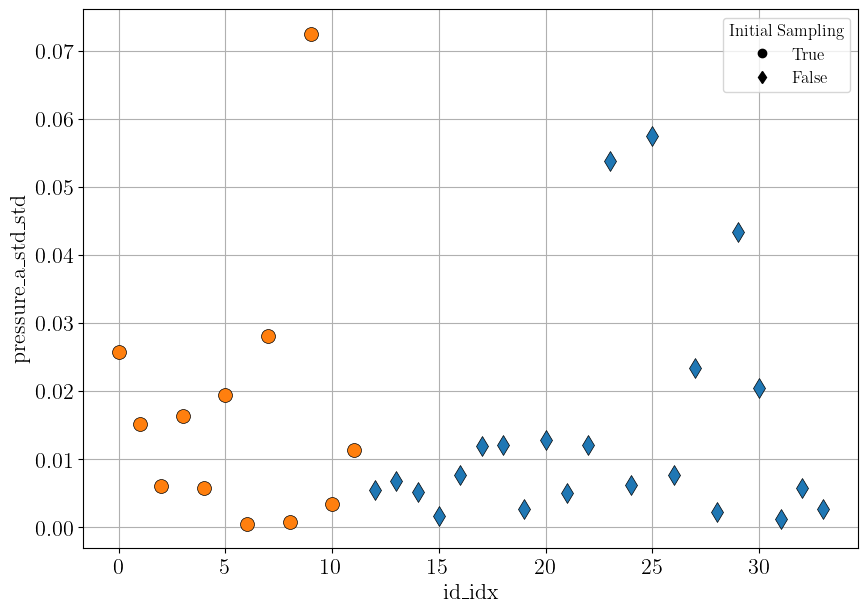

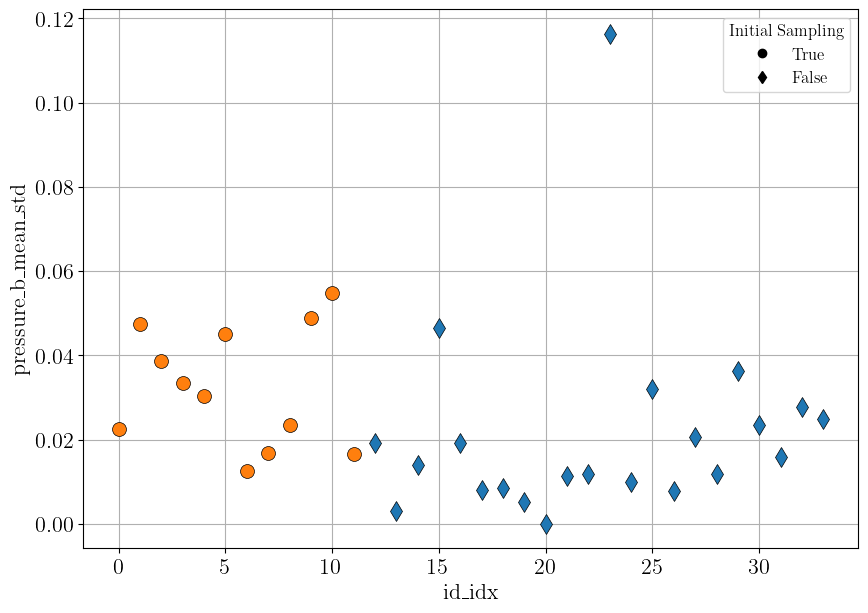

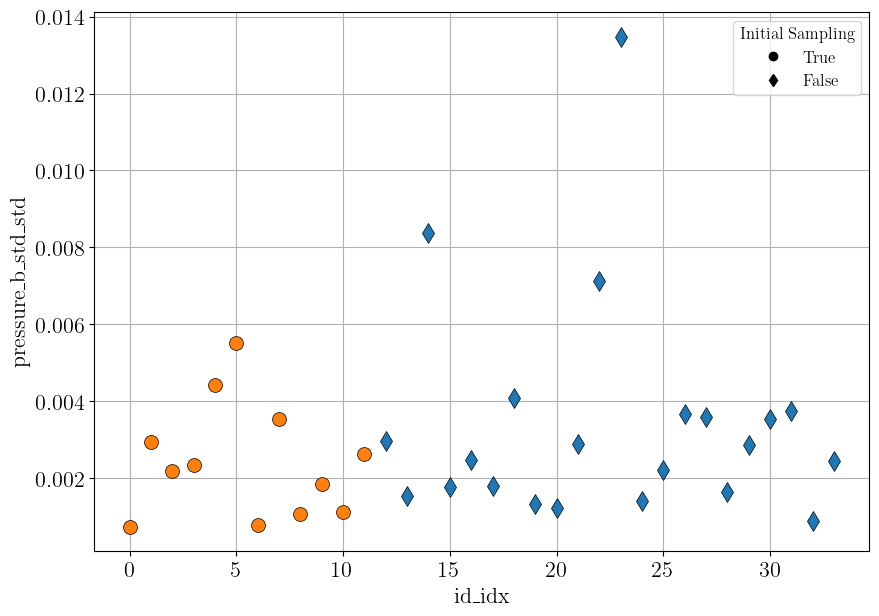

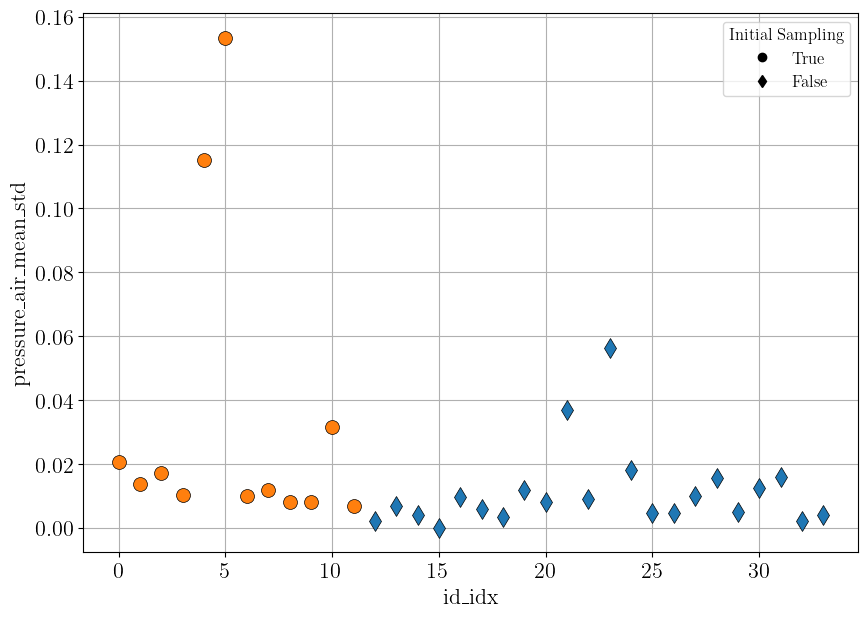

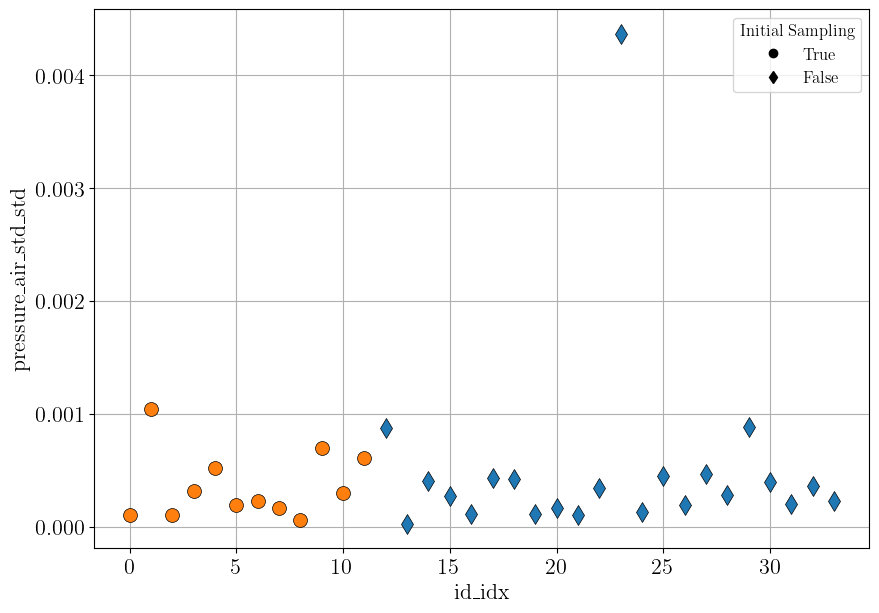

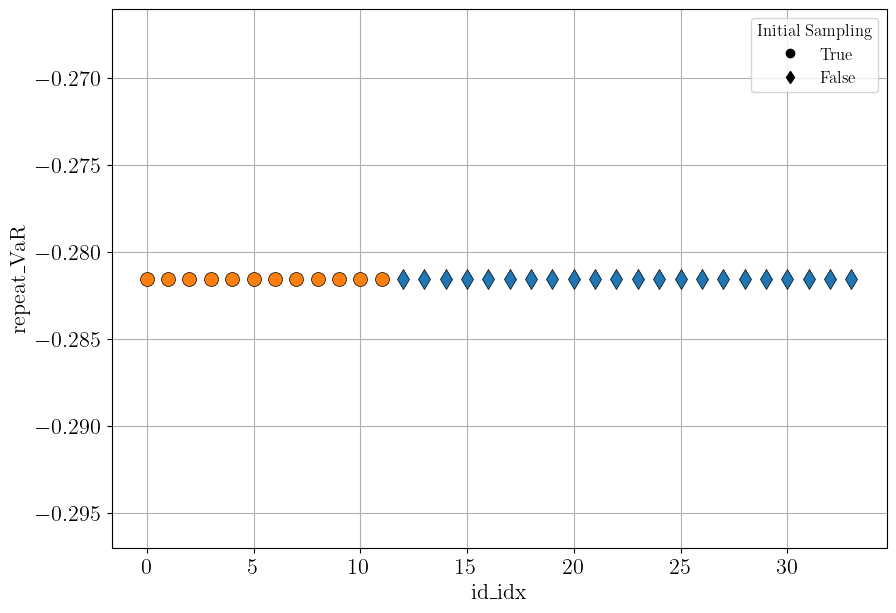

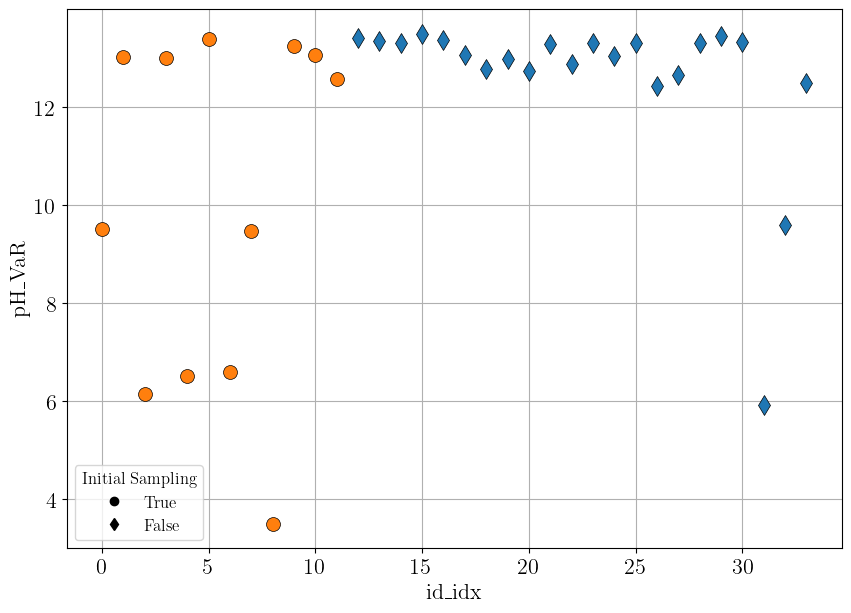

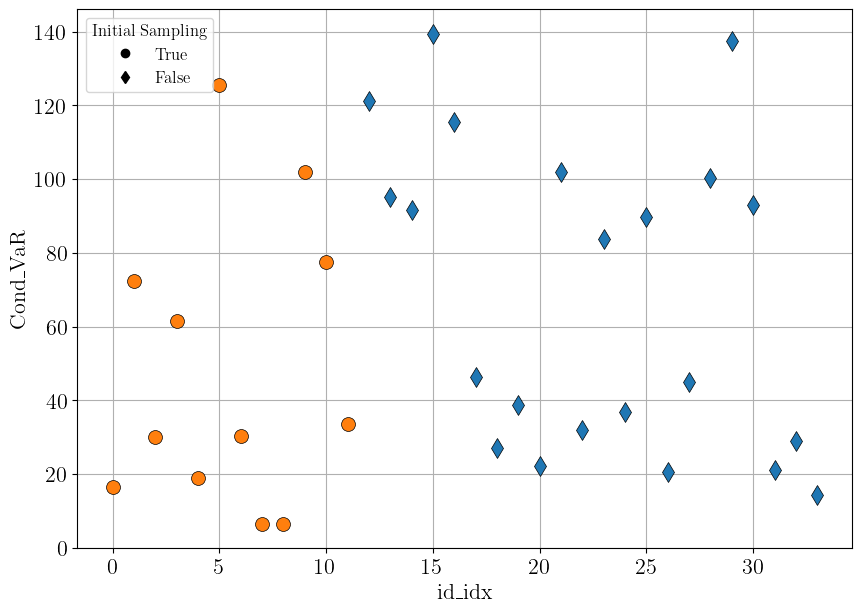

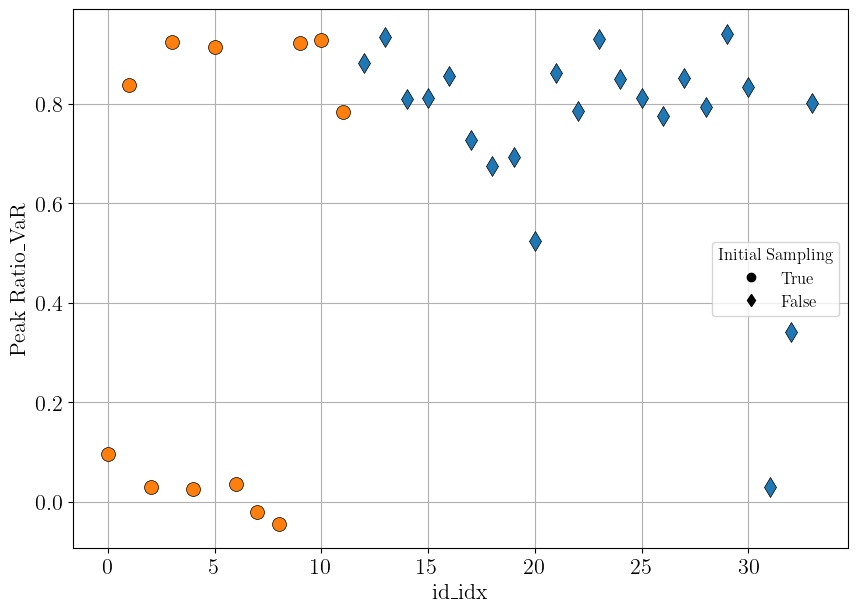

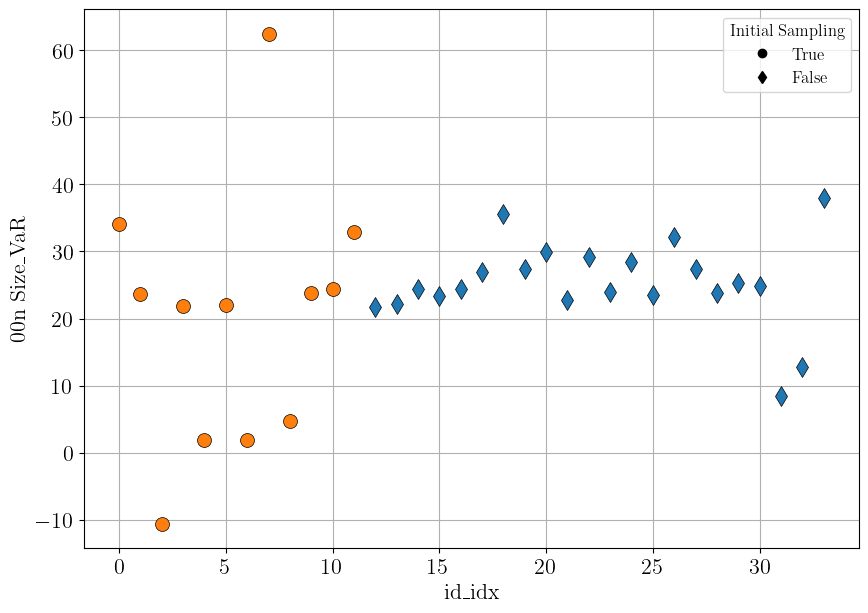

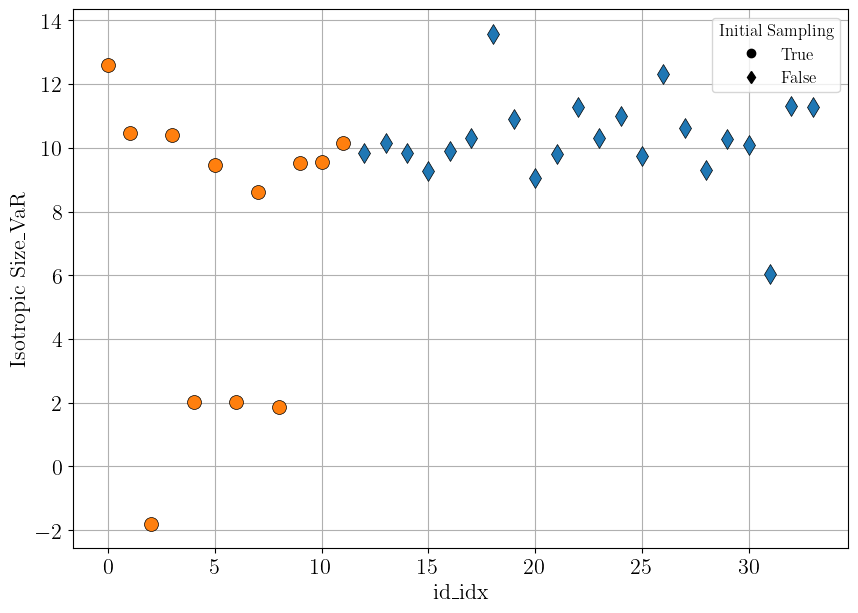

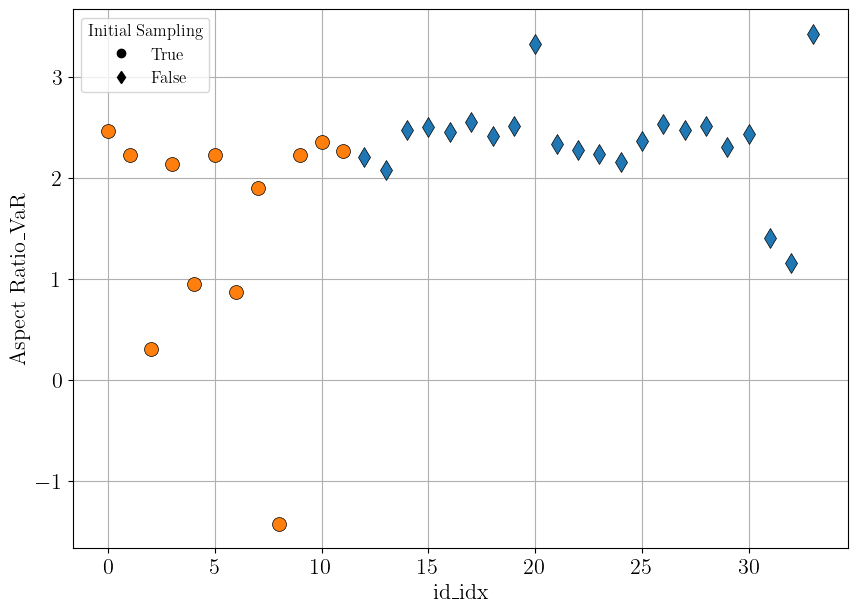

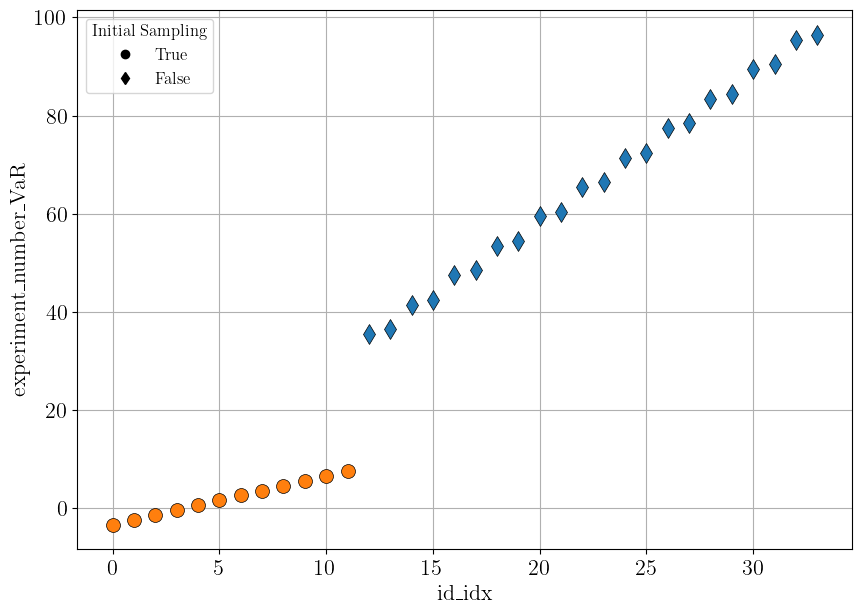

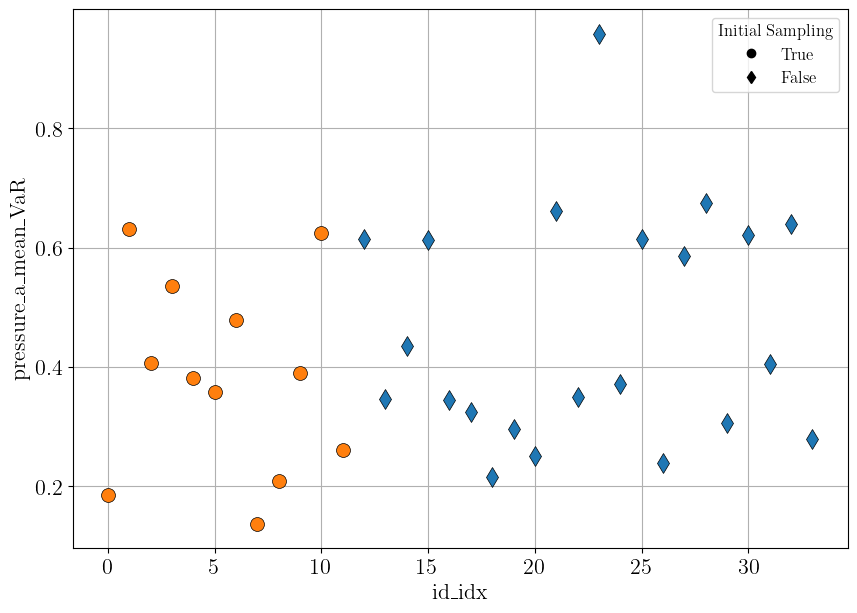

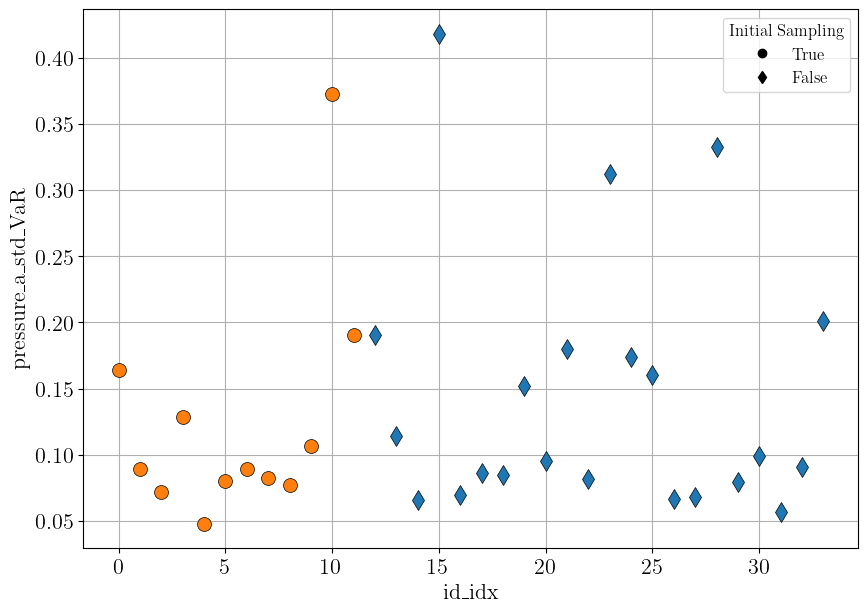

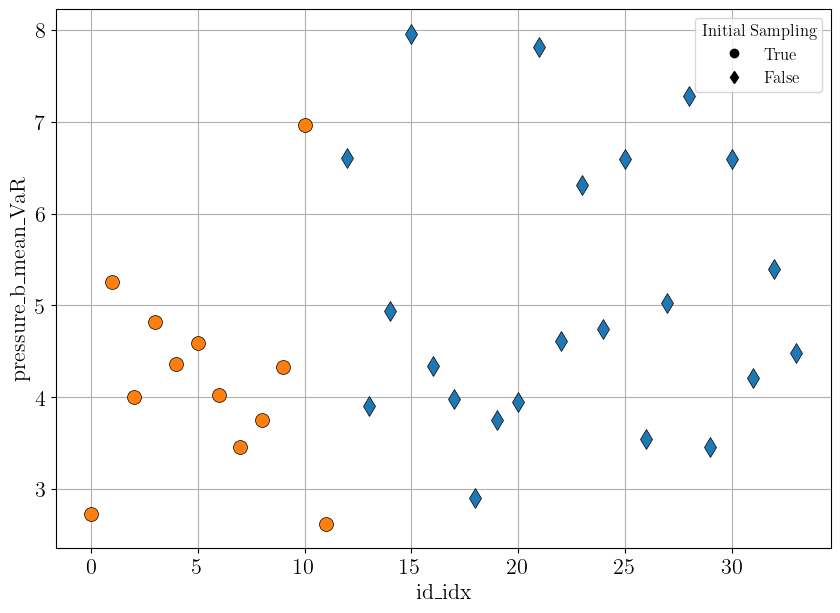

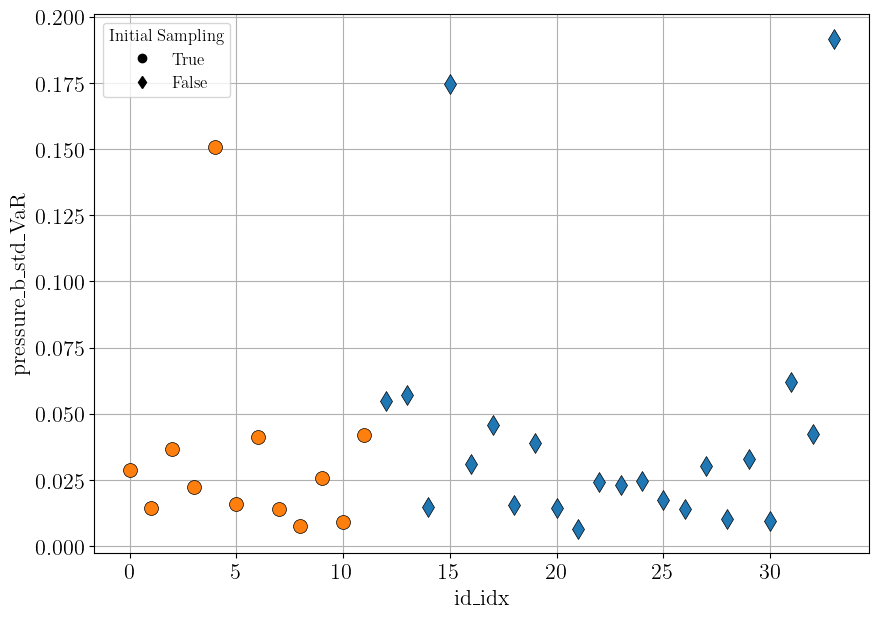

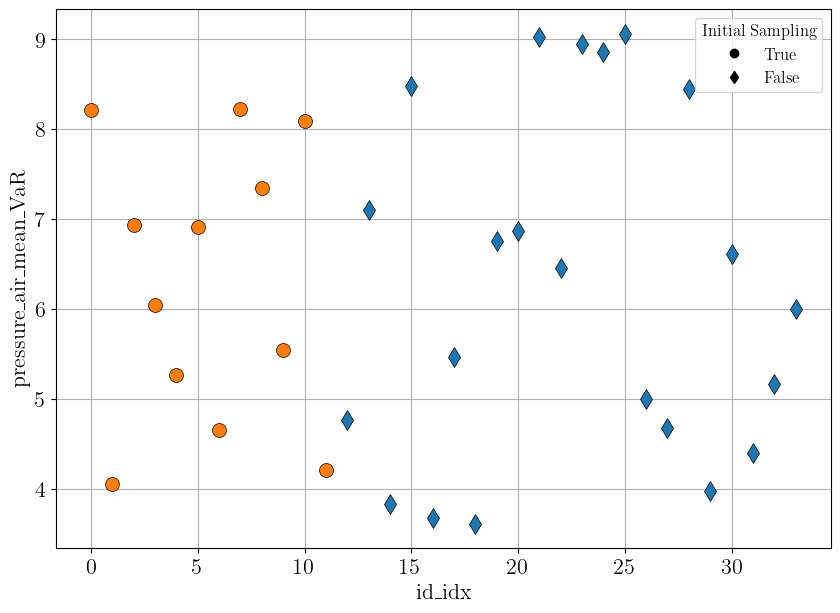

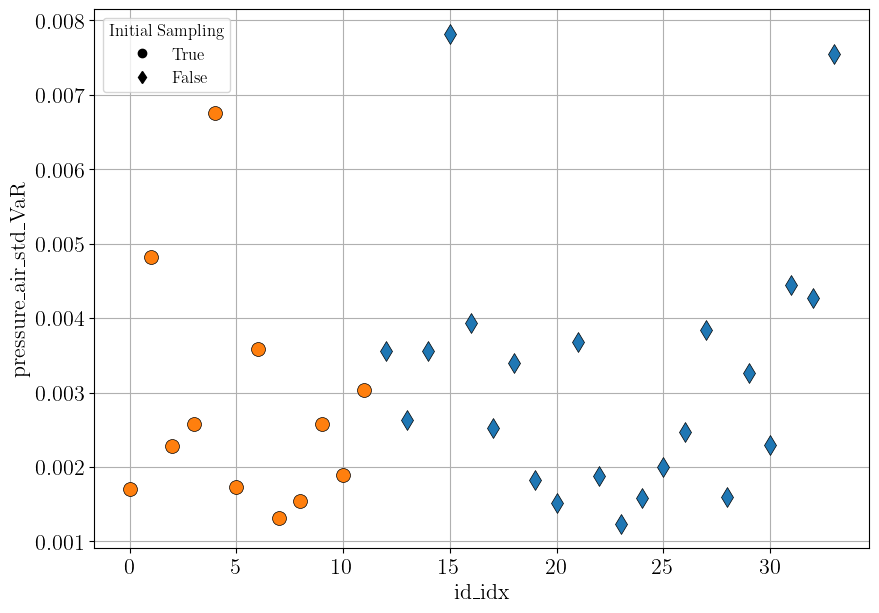

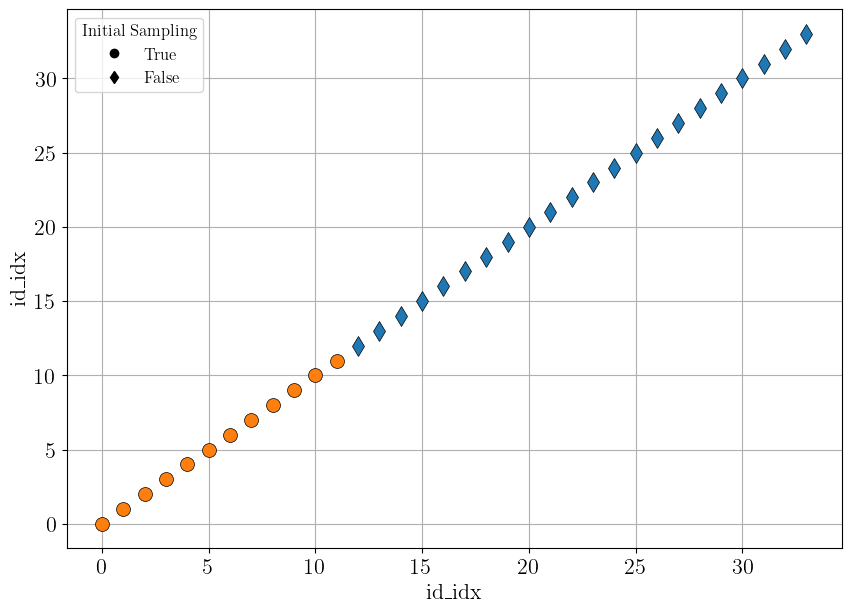

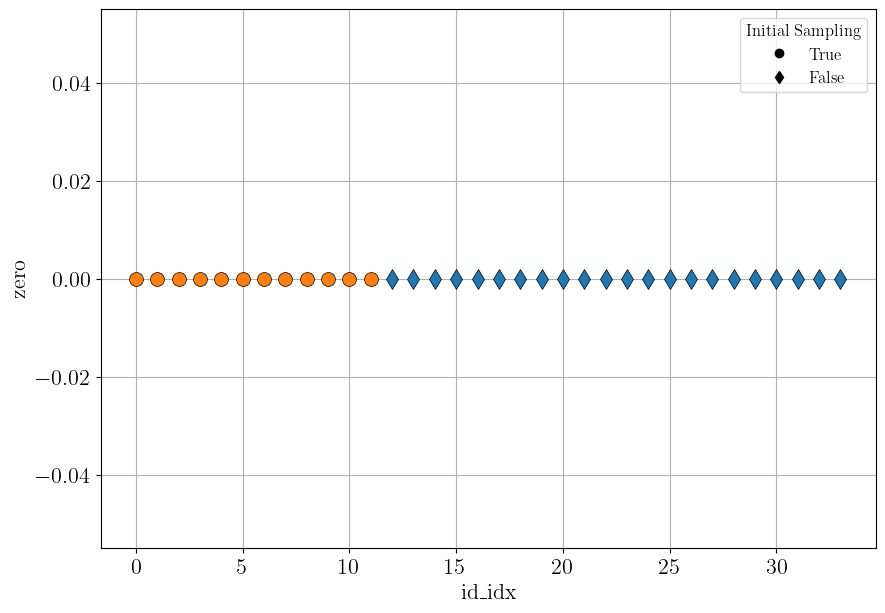

In [47]:
# %config InlineBackend.figure_format='svg'
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D

plt.rcParams.update(
    {
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Helvetica"],
        # font size
        "font.size": 16,
    }
)

plots_list = [
    ["C_OH_C_Zn", "C_Zn", "Peak Ratio_VaR", "initial_sampling", ""],
    ["C_OH_C_Zn", "C_Zn", "Peak Ratio_VaR", "initial_sampling", "filter"],
    ["Peak Ratio_mean", "Aspect Ratio_mean", "C_Zn", "initial_sampling", ""],
    ["Peak Ratio_mean", "Aspect Ratio_mean", "C_Zn", "initial_sampling", "filter"],
    ["Peak Ratio_VaR", "Aspect Ratio_VaR", "C_Zn", "initial_sampling", ""],
    ["Peak Ratio_VaR", "Aspect Ratio_VaR", "C_Zn", "initial_sampling", "filter"],
    ["C_OH_C_Zn", "C_Zn", "Aspect Ratio_VaR", "initial_sampling", ""],
    ["C_OH_C_Zn", "C_Zn", "Aspect Ratio_VaR", "initial_sampling", "filter"],
    [
        "Aspect Ratio_mean",
        "Aspect Ratio_std",
        "C_OH_C_Zn",
        "initial_sampling",
        "filter",
    ],
    [
        "Peak Ratio_mean",
        "Peak Ratio_std",
        "C_OH_C_Zn",
        "initial_sampling",
        "filter",
    ],
    [
        "Aspect Ratio_mean",
        "Aspect Ratio_std",
        "C_OH",
        "initial_sampling",
        "filter",
    ],
    [
        "Aspect Ratio_mean",
        "Aspect Ratio_std",
        "C_Zn",
        "initial_sampling",
        "filter",
    ],
    ["Peak Ratio_mean", "Peak Ratio_std", "C_Zn", "initial_sampling", "filter"],
    [
        "Aspect Ratio_mean",
        "Aspect Ratio_std",
        "initial_sampling",
        "initial_sampling",
        "filter",
    ],
    [
        "Peak Ratio_std",
        "Aspect Ratio_std",
        "initial_sampling",
        "initial_sampling",
        "filter",
    ],
    ["Peak Ratio_mean", "Aspect Ratio_mean", "N_ZnO", "initial_sampling", "filter"],
    ["Peak Ratio_std", "Aspect Ratio_std", "N_ZnO", "initial_sampling", "filter"],
    ["Peak Ratio_VaR", "Aspect Ratio_VaR", "N_ZnO", "initial_sampling", "filter"],
    ["C_OH_C_Zn", "C_Zn", "Peak Ratio_VaR", "initial_sampling", "filter"],
    ["Aspect Ratio_mean", "Aspect Ratio_std", "Q_AC", "initial_sampling", "filter"],
    ["Peak Ratio_mean", "Peak Ratio_std", "Q_AC", "initial_sampling", "filter"],
    ["Peak Ratio_mean", "Peak Ratio_std", "Q_AIR", "initial_sampling", "filter"],
    

]



if agg_type == "agg":
    data = df_mean_std
elif agg_type == "raw":
    data = df
else:
    raise ValueError(f"agg_type must be 'agg' or 'raw', got {agg_type}")



base = ["id_idx", "", "initial_sampling", "initial_sampling", ""]
idx_plots = []
for col in data.select_dtypes(include=[np.number]).columns:
    conf = [*base]
    conf[1] = col
    idx_plots.append(conf)
    
print(idx_plots)

for config in plots_list:
    
    if not all([c in data.columns for c in config[:-1]]):
        print(f"Skipping {config}")
        continue
    print(f"Plotting {config}")
    
    x,y,cc,mc,filter_data = config 
    
    fig, ax = scatter_plot(data, x, y, cc, mc, filter_data)
    save_pdf(
        fig,
        Path("."),
        f"{exp}/{agg_type}/{cc}/{mc}",
        f"{x}+{y}+{cc}+{mc}+{filter_data}".replace("/", "_"),
    )
